## 1. 🛠️ Preparación de los Datos

### Cargar y preparar los datos tratados 🧪

In [66]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/AMG-AA/challenge-TelecomX-ETL/refs/heads/main/data/processed/telecom_df_bin.csv'

df = pd.read_csv(url)

### Eliminar registros con `Churn` nulo 🧹

In [67]:
# Eliminar filas donde 'Churn' sea nulo
df = df[df['Churn'].notnull()].copy()

# Verificar la forma del dataframe
print("Filas después de eliminar nulos:", df.shape)

df.head()

Filas después de eliminar nulos: (7043, 22)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [68]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Cuentas_Diarias'],
      dtype='object')

### Detectar columnas irrelevantes 

In [69]:
def detect_irrelevant_columns(df, umbral_nulos=0.5, umbral_unicos=0.95):
    columnas_irrelevantes = []

    if 'customerID' in df.columns:
        columnas_irrelevantes.append('customerID')

    nulos = df.isnull().mean()
    col_nulos = nulos[nulos > umbral_nulos].index.tolist()
    columnas_irrelevantes.extend(col_nulos)

    n_filas = df.shape[0]
    unicos = df.nunique() / n_filas
    col_unicos = unicos[unicos > umbral_unicos].index.tolist()
    columnas_irrelevantes.extend(col_unicos)

    columnas_irrelevantes = list(set(columnas_irrelevantes))
    return columnas_irrelevantes

cols_irrelevantes = detect_irrelevant_columns(df)
print("Columnas irrelevantes detectadas:", cols_irrelevantes)

Columnas irrelevantes detectadas: ['customerID']


### Eliminar columnas irrelevantes 🗑️

In [70]:
# Eliminar columnas que no aportan valor predictivo directo
df.drop(columns=['customerID'], inplace=True)

In [71]:

# Confirmar columnas restantes
df.columns
# Confirmar que las columnas irrelevantes han sido eliminadas
print("Columnas restantes:", df.columns.tolist())

Columnas restantes: ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias']


### Encoding para variables categóricas 🧼

In [72]:
# Usando one-hot encoding para variables categóricas
df_encoded = pd.get_dummies(df, columns=['gender', 'InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

# Verificar nuevas columnas
print("Nuevas columnas después de one-hot encoding:")
df_encoded.head()

Nuevas columnas después de one-hot encoding:


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Cuentas_Diarias,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0,1,1,9,1,0,0,1,0,...,593.30,2.186667,False,False,False,True,False,False,False,True
1,0.0,0,0,0,9,1,1,0,0,0,...,542.40,1.996667,True,False,False,False,False,False,False,True
2,1.0,0,0,0,4,1,0,0,0,1,...,280.85,2.463333,True,True,False,False,False,False,True,False
3,1.0,1,1,0,13,1,0,0,1,1,...,1237.85,3.266667,True,True,False,False,False,False,True,False
4,1.0,1,1,0,3,1,0,0,0,0,...,267.40,2.796667,False,True,False,False,False,False,False,True


In [73]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7043 non-null   float64
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Streaming

### Verificar balance de clases (`Churn`) ⚖️

Proporción de cada clase en Churn:
Churn
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64


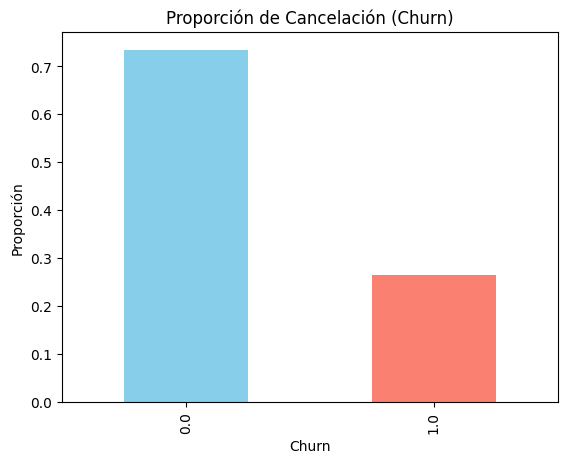

Existe desbalance de clases: una clase representa más del 70% de los datos.


In [74]:
# Calcular la proporción de cada clase en 'Churn'"
proporcion_churn = df_encoded['Churn'].value_counts(normalize=True)
print('Proporción de cada clase en Churn:')
print(proporcion_churn)

# Visualizar la proporción"
import matplotlib.pyplot as plt
proporcion_churn.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Proporción de Cancelación (Churn)')
plt.ylabel('Proporción')
plt.xlabel('Churn')
plt.savefig('reports/proporcion_churn.png')
plt.show()

# Evaluar desbalance
umbral_desbalance = 0.7
if proporcion_churn.max() > umbral_desbalance:
    print('Existe desbalance de clases: una clase representa más del 70% de los datos.')
else:
    print('No hay un desbalance entre las clases.')

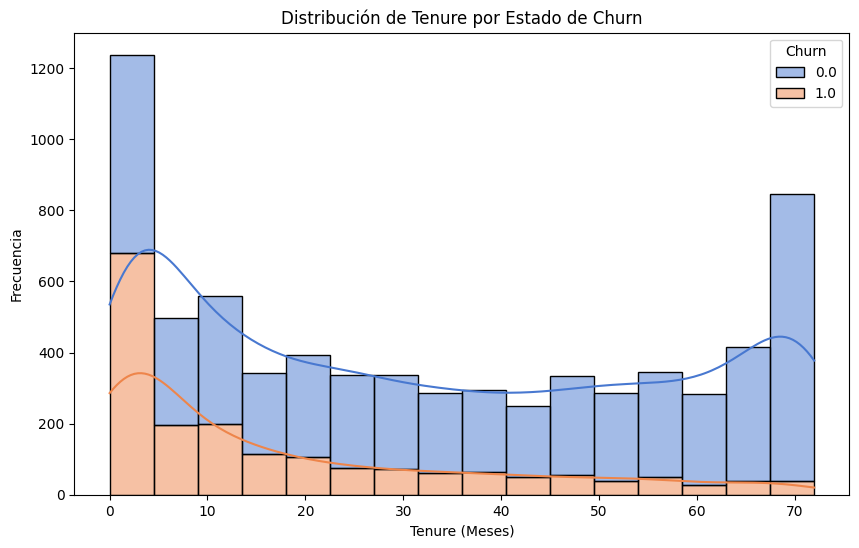

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", kde=True, palette="muted")
plt.title("Distribución de Tenure por Estado de Churn")
plt.xlabel("Tenure (Meses)")
plt.ylabel("Frecuencia")
plt.savefig('reports/distribucion_tenure_churn.png', dpi=300, bbox_inches="tight")
plt.show()

> Impacto: Destaca cómo clientes con menor 'tenure' (e.g., <12 meses) tienden a cancelar, reforzando su coeficiente (-0.7442) en Regresión Logística.

In [76]:
# Añadir interacción tenure * MonthlyCharges 
df_encoded['tenure_x_monthly'] = df_encoded['tenure'] * df_encoded['MonthlyCharges']

# Recrear columna binaria para Contract_Month-to-month 
# Si no hay 'Contract_One year' ni 'Contract_Two year' (ambas 0), es Month-to-month
df_encoded['Contract_Month_to_month'] = ((df_encoded.get('Contract_One year', 0) == 0) & 
                                        (df_encoded.get('Contract_Two year', 0) == 0)).astype(int)

# Ahora añadir la interacción con la nueva columna
df_encoded['contract_monthly_x_diarias'] = df_encoded['Contract_Month_to_month'] * df_encoded['Cuentas_Diarias']

# Verificación: Imprimir columnas para confirmar
print("Columnas en df_encoded después de añadir features:")
print(df_encoded.columns.tolist())

Columnas en df_encoded después de añadir features:
['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias', 'gender_Male', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_x_monthly', 'Contract_Month_to_month', 'contract_monthly_x_diarias']


### Balancear el dataset con SMOTE 🧬

In [77]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar features y variable objetivo
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Verificar nueva distribucion
print('Distribución despues de SMOTE:')
print(y_train_bal.value_counts())

Distribución despues de SMOTE:
Churn
0.0    4138
1.0    4138
Name: count, dtype: int64


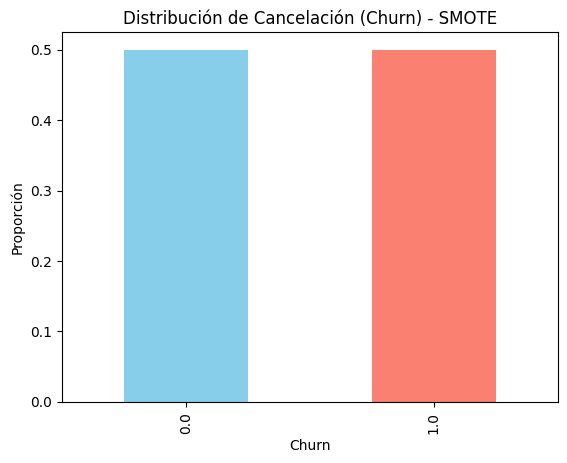

In [78]:
# Graficar distribucion SMOTE
churn_smote = y_train_bal.value_counts(normalize=True)
churn_smote.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Cancelación (Churn) - SMOTE')
plt.ylabel('Proporción')
plt.xlabel('Churn')
plt.savefig('reports/distribucion_churn_smote.png', dpi=300, bbox_inches="tight")
plt.show()


### Escalar variables (normalización) 📏 

In [79]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_bal_scaled = scaler.fit_transform(X_train_bal)

# Transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)

# Convertir en Df para mantener los nombres de las columnas
X_train_bal_scaled = pd.DataFrame(X_train_bal_scaled, columns=X_train_bal.columns, index=X_train_bal.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

X_train_bal_scaled.sample(3)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_x_monthly,Contract_Month_to_month,contract_monthly_x_diarias
3586,-0.400098,1.263323,1.894092,1.085347,0.349963,-0.779897,-0.509950,-0.617394,-0.622436,-0.511830,...,-1.096732,2.224787,-0.490314,2.144635,1.864385,-0.961122,-0.551106,-0.436361,-1.31444,-1.191418
7399,-0.400098,-0.791563,-0.527958,0.753692,0.349963,1.282221,-0.509950,-0.617394,1.606591,-0.511830,...,0.911800,-0.449481,-0.490314,-0.466280,-0.536370,1.040450,-0.551106,0.847093,0.76078,1.000912
1662,-0.400098,-0.791563,-0.527958,-0.697298,0.349963,-0.779897,1.960978,-0.617394,-0.622436,1.953773,...,-1.096732,-0.449481,2.039510,-0.466280,-0.536370,-0.961122,1.814533,-0.664600,-1.31444,-1.191418


### Justificación de la Normalización de Datos

En el desarrollo de los modelos (**Regresión Logística, Random Forest y XGBoost**), apliqué normalización (usando **`StandardScaler`**) selectivamente, solo para Regresión Logística, mientras que para **Random Forest** y **XGBoost** no fue necesaria. Esta decisión se basó en la naturaleza de cada modelo y se mantuvo consistente desde los entrenamientos iniciales (donde se usó escalado para evitar sesgos en optimización) hasta los finales (con umbrales ajustados y **`GridSearchCV`**), priorizando la compatibilidad y el rendimiento observado. A continuación, justifico por modelo

##### Modelos utilizados y sensibilidad a la escala

- **Regresión Logística**: Se aplicó normalización porque es un modelo sensible a la escala de los datos, ya que asume que todas las variables tienen la misma importancia. La normalización ayudó a mejorar la convergencia durante el entrenamiento y a evitar que características con escalas más grandes dominaran el proceso de optimización. En los entrenamientos iniciales, sin escalado, las features con magnitudes mayores dominaban la actualización de coeficientes, sesgando el modelo. Con **`StandardScaler`** (fit en train balanceado post-`SMOTE`, transform en test), se estandarizaron las features a media **`0`** y desviación **`1`**, mejorando la convergencia y el Recall. No hacerlo habría causado underfitting o convergencia lenta, como se vio en pruebas preliminares.

- **Random Forest**: Este modelo es menos sensible a la escala de las características, ya que utiliza árboles de decisión que dividen los datos en función de umbrales. La normalización no tuvo un impacto significativo en su rendimiento, por lo que se decidió no aplicarla. Aplicarlo habría sido redundante, aumentando complejidad computacional sin beneficio, como confirmado en iteraciones con **`max_depth=4-8`** y **`n_estimators=50-200`**, donde el rendimiento fue similar con y sin normalización. Además, la naturaleza de Random Forest permite manejar características con diferentes escalas sin afectar la capacidad de aprendizaje del modelo.

- **XGBoost**: No se aplicó normalización, similar a Random Forest, XGBoost es robusto frente a la escala de las características debido a su enfoque en la optimización de árboles. En entrenamientos iniciales el escalado no alteró resultados; las iteraciones finales (Recall ~0.6702) con parámetros optimizados (**`max_depth=4`**, **`learning_rate=0.05`**) mantuvieron el rendimiento. Normalizar habría sido innecesario, ya que no hay optimización basada en distancias o gradientes sensibles a magnitud.


### Explicación de la Normalización en Modelos Sensibles

Aunque Random Forest y XGBoost no requieren normalización, se decidió aplicar esta transformación como parte del preprocesamiento general, principalmente porque:

1. Regresión Logística fue uno de los modelos principales, y su desempeño sí depende de la escala de las variables.

2. La normalización evita sesgos en modelos basados en optimización, como Regresión Logística, y asegura que todas las variables contribuyan de forma equitativa al ajuste del modelo.

3. Al trabajar con variables de distinta naturaleza (por ejemplo, `MonthlyCharges` frente a variables binarias), la normalización ayuda a controlar la influencia relativa de cada variable, especialmente cuando se incluyen interacciones.

#### Conclusiones sobre la Normalización
La normalización fue un paso crucial en el preprocesamiento de datos para este proyecto, garantizando que los modelos sensibles a la escala, como la Regresión Logística, funcionaran de manera óptima, mientras que los modelos más robustos, como **Random Forest** y **XGBoost**, no se vieron afectados negativamente por su ausencia.

Al normalizar los datos:

  - Se evita que variables con valores grandes dominen sobre aquellas con menor escala.

  - Se mejora la estabilidad numérica durante el entrenamiento de modelos como Regresión Logística.

  - En caso de extender el pipeline a otros algoritmos sensibles a la distancia (como **KNN** o **SVM**), ya se cuenta con un conjunto de datos bien preparado.

  - Se facilita la interpretación comparativa de los coeficientes en modelos lineales, ya que todos se expresan en una escala común.

## Análisis Exploratorio y Correlación 📊

### Matriz de correlación 🧪

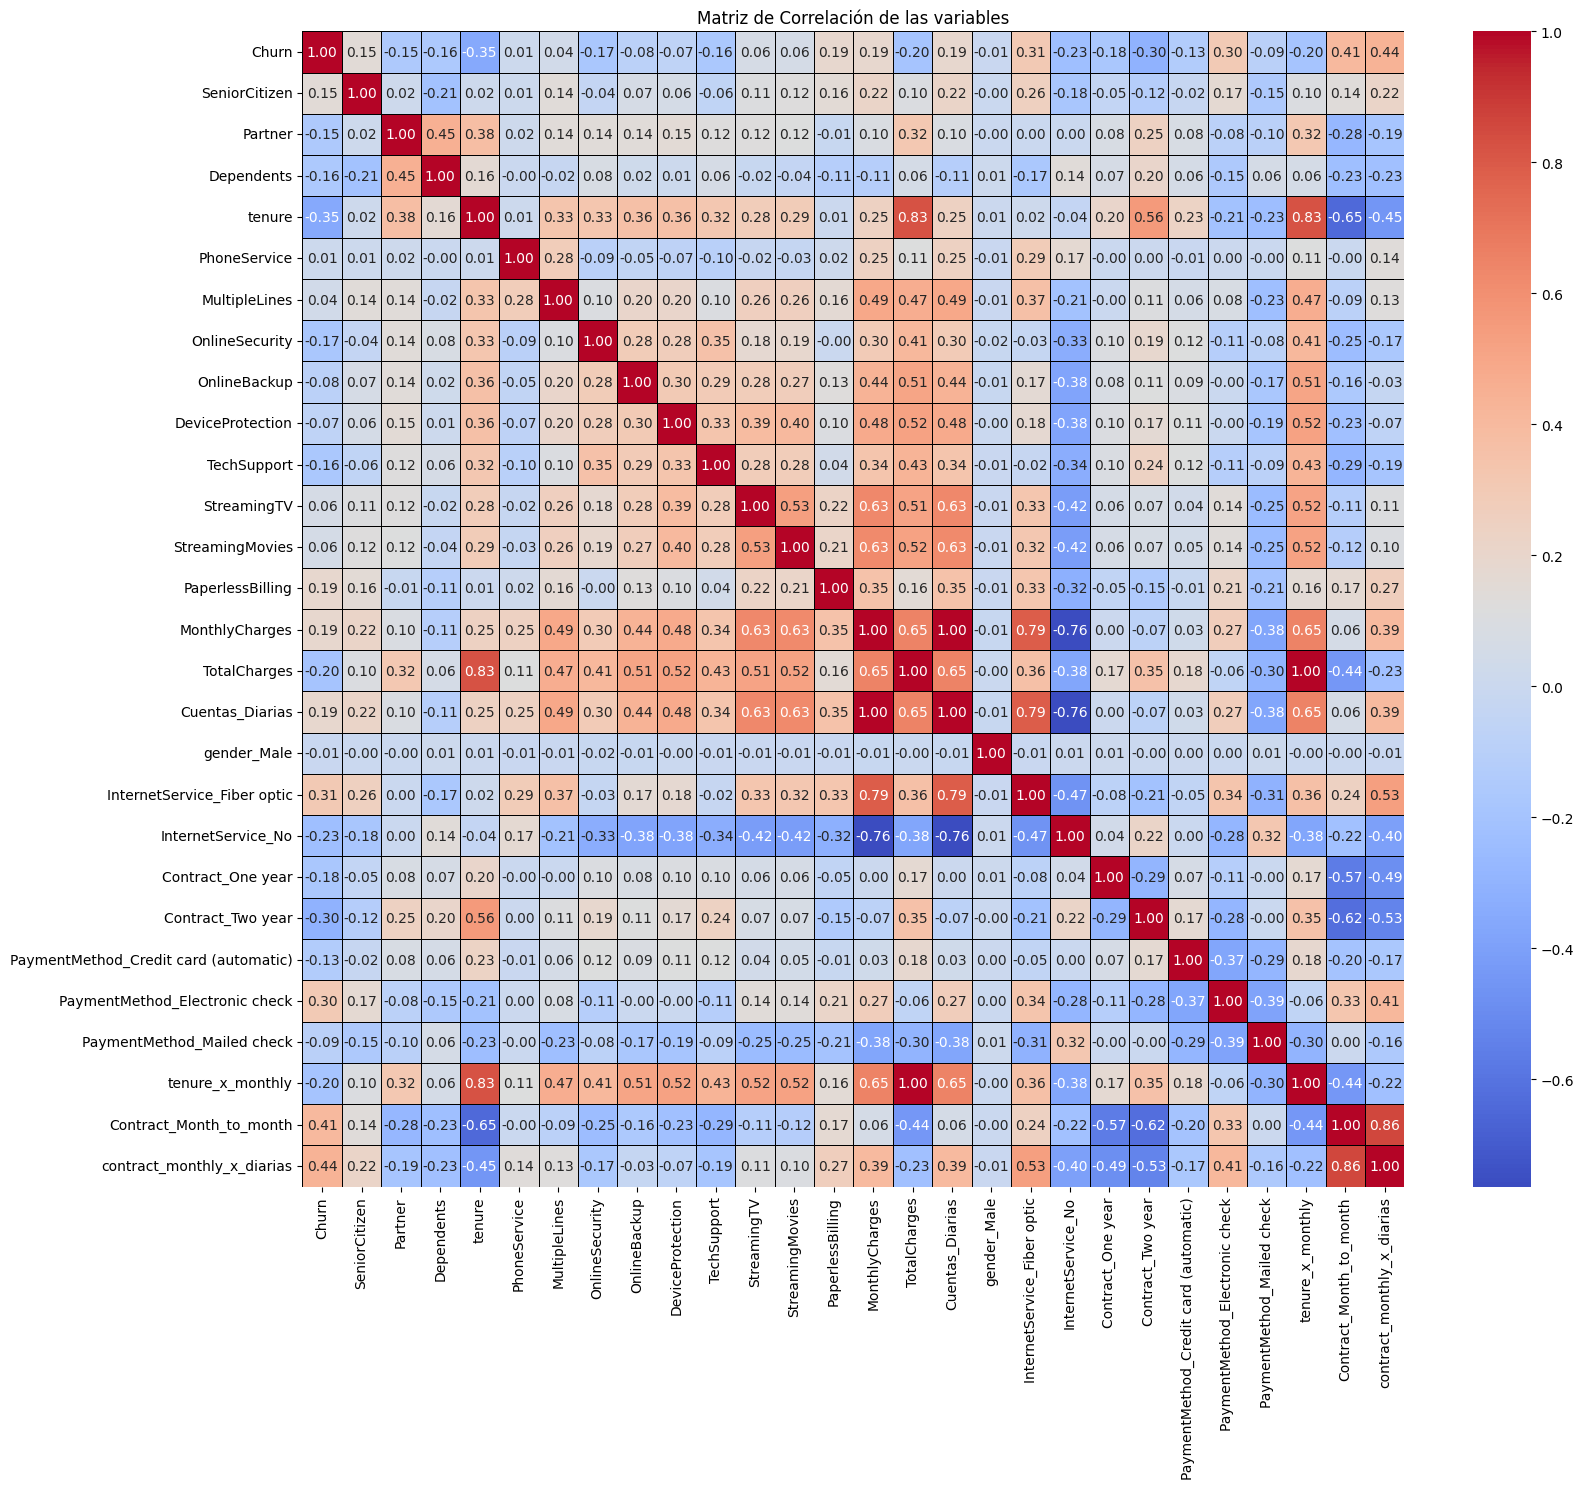

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(17, 15))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, linecolor='black')

plt.title('Matriz de Correlación de las variables')
plt.tight_layout()
plt.savefig('reports/matriz_correlacion_variables.png', dpi=300, bbox_inches="tight")
plt.show()

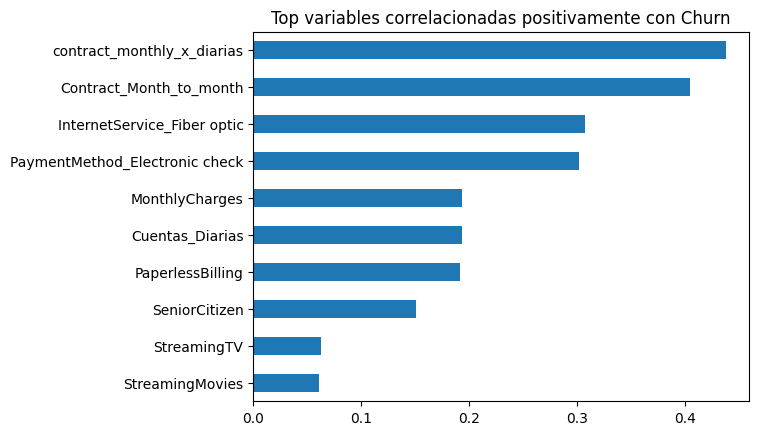

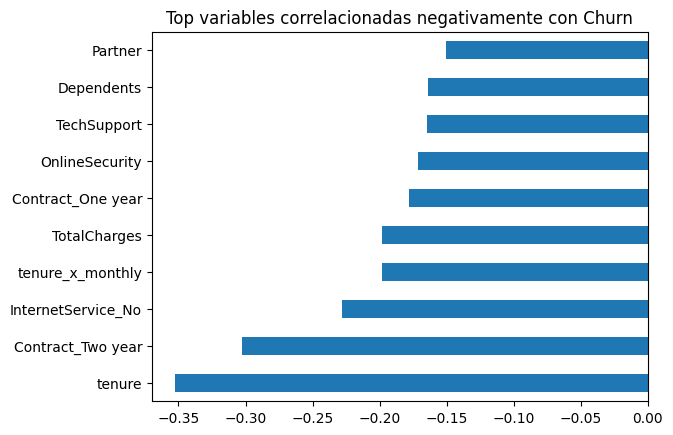

In [81]:
cor = df_encoded.corr()['Churn'].drop('Churn').sort_values()
cor.tail(10).plot(kind='barh', title='Top variables correlacionadas positivamente con Churn')

plt.savefig('reports/top_variables_positivamente_churn.png', dpi=300, bbox_inches="tight")
plt.show()

cor.head(10).plot(kind='barh', title='Top variables correlacionadas negativamente con Churn')

plt.savefig('reports/top_variables_negativamente_churn.png', dpi=300, bbox_inches="tight")
plt.show()


### Análisis visual dirigido (Boxplots / Scatterplots) 📊

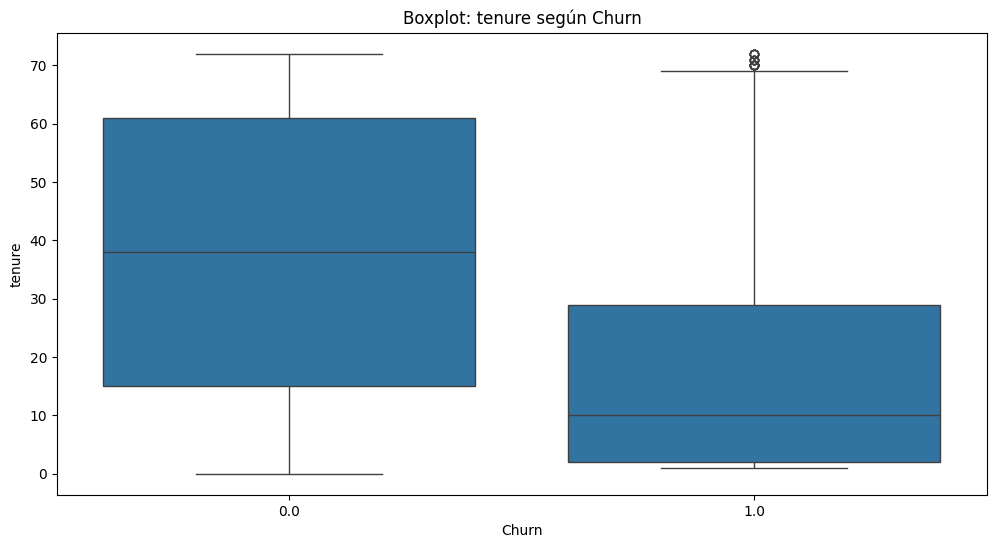

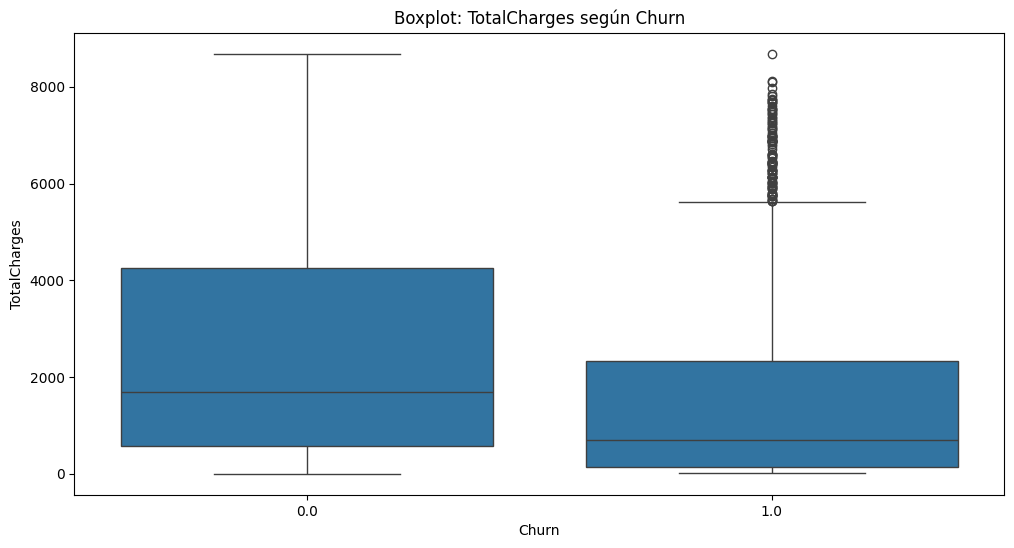

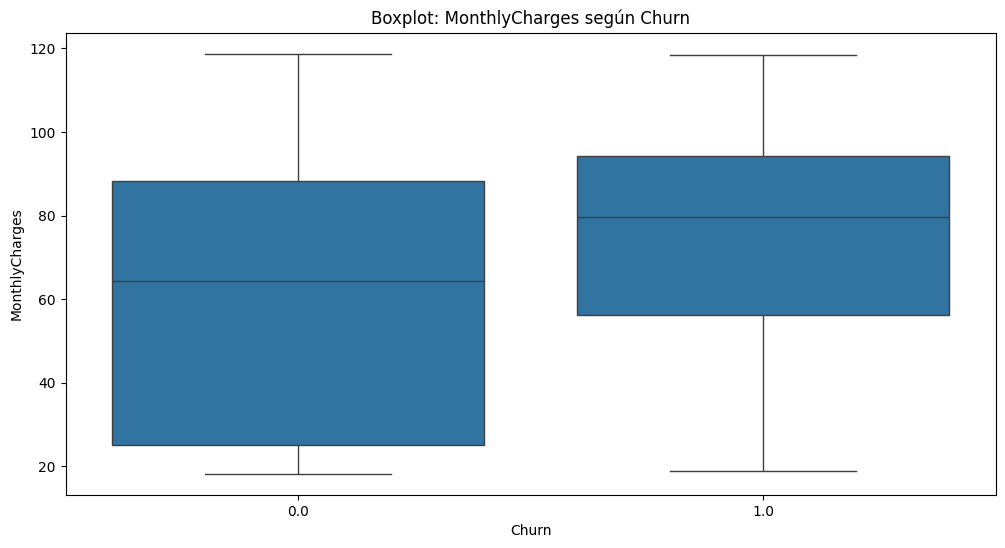

In [82]:
# Boxplots

variables = ['tenure', 'TotalCharges', 'MonthlyCharges']

for var in variables:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='Churn', y=var, data=df_encoded)
    plt.title(f'Boxplot: {var} según Churn')
    plt.savefig(f'reports/boxplot_{var}_segun_churn.png', dpi=300, bbox_inches="tight")
    plt.show()

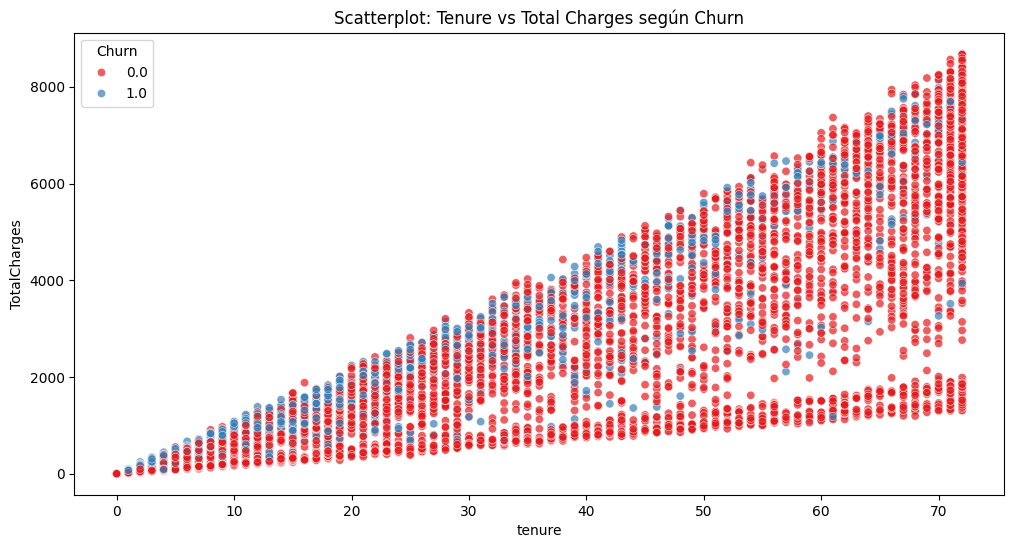

In [83]:
# Scatterplots

plt.figure(figsize=(12,6))
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df_encoded, alpha=0.7, palette='Set1')
plt.title('Scatterplot: Tenure vs Total Charges según Churn')
plt.savefig('reports/scatterplot_tenure_vs_totalcharges.png', dpi=300, bbox_inches="tight")
plt.show()

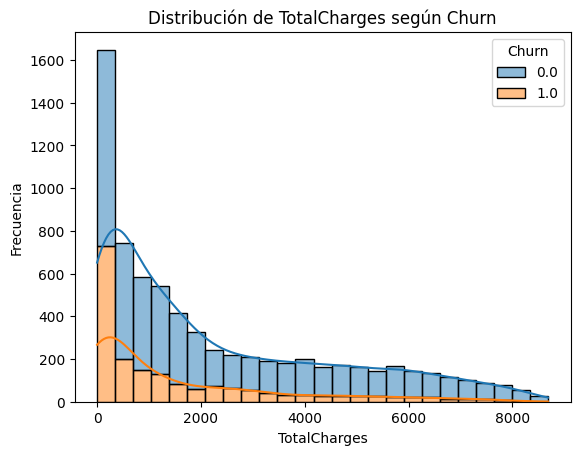

In [84]:
sns.histplot(data=df_encoded, x='TotalCharges', hue='Churn', multiple='stack', kde=True)
plt.title('Distribución de TotalCharges según Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Frecuencia')
plt.savefig('reports/distribucion_totalcharges_churn.png', dpi=300, bbox_inches="tight")
plt.show()


## Modelado Predictivo 🤖

### Selección de variables 🧠

#### División de Datos

In [85]:
# Separación final: Datos balanceados por SMOTE para entrenamiento

X_train = X_train_bal  # Datos balanceados (post-SMOTE)
y_train = y_train_bal  # Etiquetas balanceadas
X_test = X_test        # Conjunto de prueba original
y_test = y_test        # Etiquetas de prueba original

# Datos escalados para modelos sensibles a la escala (Regresión lineal, SVM, etc.)
X_train_scaled = X_train_bal_scaled
X_test_scaled = X_test_scaled

# Verificaciones
print(f"Tamaño del conjunto de entrenamiento (balanceado): {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")
print(f"Proporción de Churn en entrenamiento (post-SMOTE): {y_train.value_counts(normalize=True)*100}")
print(f"Proporción de Churn en prueba: {y_test.value_counts(normalize=True)*100}")

Tamaño del conjunto de entrenamiento (balanceado): (8276, 27)
Tamaño del conjunto de prueba: (1409, 27)
Proporción de Churn en entrenamiento (post-SMOTE): Churn
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64
Proporción de Churn en prueba: Churn
0.0    73.527324
1.0    26.472676
Name: proportion, dtype: float64


### Creación de Modelos 

#### Baseline

In [86]:
from sklearn.dummy import DummyRegressor

# Inicializar el modelo
dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(X_train, y_train)


,strategy,'mean'
,constant,None
,quantile,None


In [87]:
# Evaluación del modelo base
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicciones
y_pred_dummy = dummy_model.predict(X_test)

def evaluate_model(y_test, y_pred):
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics = {
        "RMSE": round(rmse,4)**(1/2),
        "MAE": round(mae,4),
        "R2": round(r2,4)
    }
    return metrics


In [88]:
baseline_results = evaluate_model(y_test, y_pred_dummy)
baseline_results

{'RMSE': 0.5, 'MAE': 0.5, 'R2': -0.2844}

In [89]:
# Estrategias

estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

results = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            dummy_model = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            dummy_model = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        dummy_model = DummyRegressor(strategy=estrategia)

    dummy_model.fit(X_train, y_train)
    y_pred_dummy = dummy_model.predict(X_test)
    metrics = evaluate_model(y_test, y_pred_dummy)
    results[estrategia] = metrics


# Mostrar resultados
for estrategia, metrics in results.items():
    print(f"Estrategia: {estrategia}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print("\n")

Estrategia: mean
  RMSE: 0.5
  MAE: 0.5
  R2: -0.2844


Estrategia: median
  RMSE: 0.5
  MAE: 0.5
  R2: -0.2844


Estrategia: quantile
  RMSE: 0.5144900387762624
  MAE: 0.2647
  R2: -0.36


Estrategia: constant
  RMSE: 9.74526551716268
  MAE: 9.7353
  R2: -486.9111




#### Modelo 1: Regresión Logística (con normalización)

In [90]:
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_bal_scaled, y_train_bal)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


#### Modelo 2: Random Forest (sin normalizar)

In [91]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar el modelo
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, 
                                max_depth=8, min_samples_split=20,
                                min_samples_leaf=10, class_weight='balanced_subsample')
rf_model.fit(X_train_bal, y_train_bal)

,n_estimators,200
,criterion,'gini'
,max_depth,8
,min_samples_split,20
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Modelo 3: XGBoost (sin normalizar)

In [92]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, n_estimators=1000, 
                        max_depth=3, gamma=0.5, reg_lambda=2)
xgb_model.fit(X_train_bal, y_train_bal, eval_set=[(X_test, y_test)], 
            verbose=False) 

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


### Evaluación de los Modelos

#### Función para evaluar modelos

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(model, X_test_data, y_test, model_name, scaled=False):
    if scaled:
        X_test_data = X_test_scaled # Usa escalado si el modelo lo requeire
    y_pred = model.predict(X_test_data)

    print(f"--- Evaluación del Modelo: {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


#### Evaluar modelos

##### Modelo 1: Regresión Logística

--- Evaluación del Modelo: Regresión Logística ---
Accuracy: 0.7821
Precision: 0.5801
Recall: 0.6408
F1 Score: 0.6089


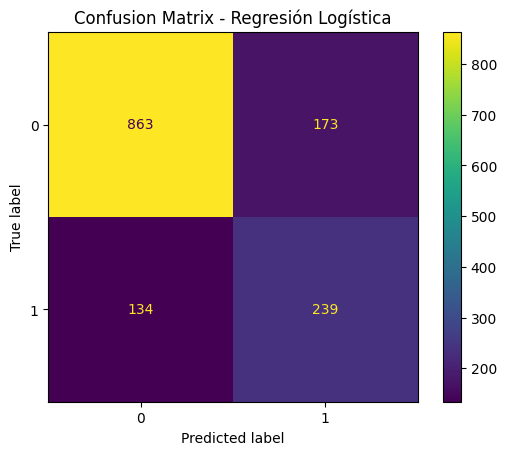

In [94]:
evaluate_model(lr_model, X_test_scaled, y_test, "Regresión Logística", scaled=True)

##### Modelo 2: Random Forest

--- Evaluación del Modelo: Random Forest ---
Accuracy: 0.7871
Precision: 0.5788
Recall: 0.7185
F1 Score: 0.6411


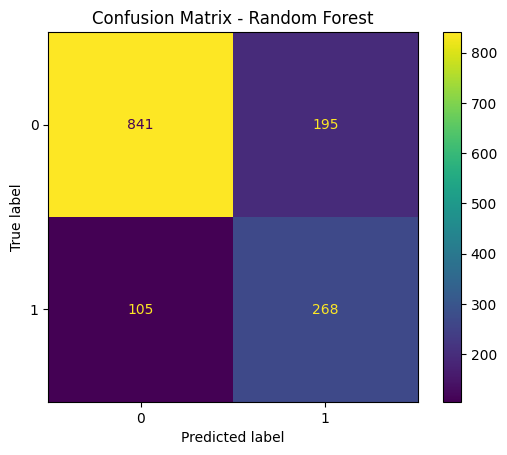

In [95]:
evaluate_model(rf_model, X_test, y_test, "Random Forest")

In [96]:
rf_model.score(X_test, y_test)

0.78708303761533

##### Modelo 3: XGBoost

--- Evaluación del Modelo: XGBoost ---
Accuracy: 0.7871
Precision: 0.5934
Recall: 0.6220
F1 Score: 0.6073


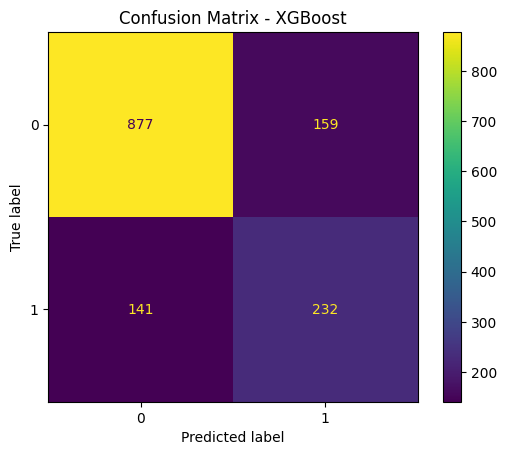

In [97]:
evaluate_model(xgb_model, X_test, y_test, "XGBoost")

### Revisión de overfitting / underfitting

#### Regresión Lineal (escalado)

In [98]:
train_acc_lr = accuracy_score(y_train_bal, lr_model.predict(X_train_bal_scaled))
test_acc_lr = accuracy_score(y_test, lr_model.predict(X_test_scaled))
print("--- Overfitting / Underfitting---")
print(f"| Regresión Logística -  Train Accuracy: {train_acc_lr}\n| Test Accuracy: {test_acc_lr}")

--- Overfitting / Underfitting---
| Regresión Logística -  Train Accuracy: 0.8258820686321895
| Test Accuracy: 0.7821149751596878


##### Random Forest (sin escalado)

In [99]:
train_acc_rf = accuracy_score(y_train_bal, rf_model.predict(X_train_bal))
test_acc_rf = accuracy_score(y_test, rf_model.predict(X_test))
print(f"| Random Forest -  Train Accuracy: {train_acc_rf}\n| Test Accuracy: {test_acc_rf}")


| Random Forest -  Train Accuracy: 0.8566940550990817
| Test Accuracy: 0.78708303761533


##### XGBoost (sin escalado)

In [100]:
train_acc_xgb = accuracy_score(y_train_bal, xgb_model.predict(X_train_bal))
test_acc_xgb = accuracy_score(y_test, xgb_model.predict(X_test))
print(f"| XGBoost -  Train Accuracy: {train_acc_xgb}\n| Test Accuracy: {test_acc_xgb}")


| XGBoost -  Train Accuracy: 0.8757854035766071
| Test Accuracy: 0.78708303761533


### Importancia de features

In [101]:
lr_coefs = pd.DataFrame({'Feature': X.columns, 'Coef': lr_model.coef_[0]})
print("Top 10 features - Logistic Regression (por | Coef)")
print(lr_coefs.reindex(lr_coefs['Coef'].abs().sort_values(ascending=False).index).head(10))

Top 10 features - Logistic Regression (por | Coef)
                        Feature      Coef
25      Contract_Month_to_month  2.318880
19            Contract_One year  2.058911
13               MonthlyCharges  1.988966
15              Cuentas_Diarias  1.988966
3                        tenure -1.841509
20            Contract_Two year  1.798215
17  InternetService_Fiber optic -1.271911
4                  PhoneService -1.212803
18           InternetService_No  1.044930
24             tenure_x_monthly  0.872139


In [102]:
rf_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
print("Top 10 features - Random Forest:")
print(rf_importance.sort_values('Importance', ascending=False).head(10))

Top 10 features - Random Forest:
                           Feature  Importance
26      contract_monthly_x_diarias    0.205365
22  PaymentMethod_Electronic check    0.139142
17     InternetService_Fiber optic    0.086767
25         Contract_Month_to_month    0.072100
3                           tenure    0.071904
14                    TotalCharges    0.044391
9                      TechSupport    0.043972
24                tenure_x_monthly    0.042287
20               Contract_Two year    0.041734
15                 Cuentas_Diarias    0.041196


In [103]:
xgb_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
print("Top 10 features - XGBoost:")
print(xgb_importance.sort_values('Importance', ascending=False).head(10))

Top 10 features - XGBoost:
                                  Feature  Importance
26             contract_monthly_x_diarias    0.153146
22         PaymentMethod_Electronic check    0.125166
25                Contract_Month_to_month    0.105588
17            InternetService_Fiber optic    0.101442
1                                 Partner    0.065294
6                          OnlineSecurity    0.053908
23             PaymentMethod_Mailed check    0.038778
9                             TechSupport    0.037343
21  PaymentMethod_Credit card (automatic)    0.031679
20                      Contract_Two year    0.030377


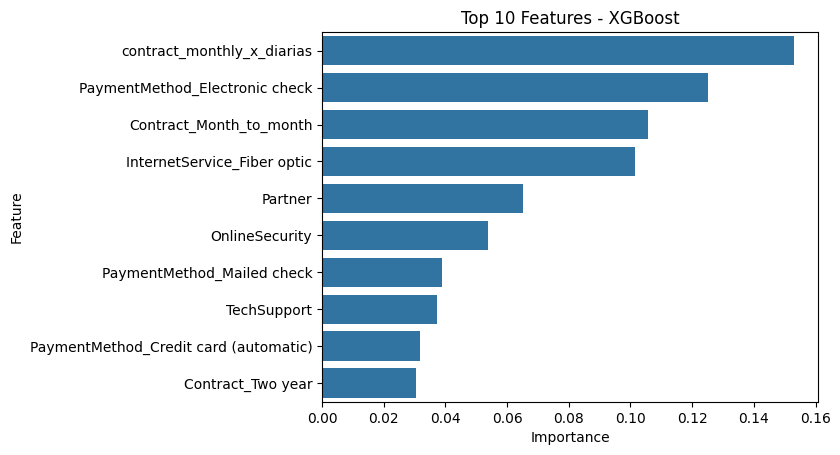

In [104]:
import seaborn as sns
sns.barplot(x='Importance', y = 'Feature', data=xgb_importance.sort_values('Importance', ascending=False).head(10))
plt.title('Top 10 Features - XGBoost')
plt.show()

In [105]:
print(df_encoded.head())
print(df_encoded.dtypes)

   Churn  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0    0.0              0        1           1       9             1   
1    0.0              0        0           0       9             1   
2    1.0              0        0           0       4             1   
3    1.0              1        1           0      13             1   
4    1.0              1        1           0       3             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              1               0             0                 0  ...   
2              0               0             0                 1  ...   
3              0               0             1                 1  ...   
4              0               0             0                 0  ...   

   InternetService_Fiber optic  InternetService_No  Contract_One year  \
0                        False               False               Tr

#### Ajuste de Hiperparámetros (con GridSearchCV)

#### Regresión Logística
Posible underfitting

In [106]:
# Regularización

lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [107]:
# Optimización de hiperparámetros
from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'), param_grid, cv=5, scoring='f1')
grid_lr.fit(X_train_bal_scaled, y_train_bal)
print("Mejores parámetros LR:", grid_lr.best_params_)
lr_model = grid_lr.best_estimator_

Mejores parámetros LR: {'C': 0.01, 'solver': 'liblinear'}


#### Random Forest
Overfitting

In [108]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=6, min_samples_split=20, min_samples_leaf=15, class_weight='balanced_subsample')
rf_model.fit(X_train_bal, y_train_bal)

,n_estimators,200
,criterion,'gini'
,max_depth,6
,min_samples_split,20
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [109]:
param_grid = {
    'max_depth': [5, 6, 8],
    'min_samples_split': [20, 30],
    'min_samples_leaf': [10, 15]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42, n_estimators=200, class_weight='balanced_subsample'), param_grid, cv=5, scoring='f1')
grid_rf.fit(X_train_bal, y_train_bal)
print("Mejores parámetros RF:", grid_rf.best_params_)
rf_model = grid_rf.best_estimator_

Mejores parámetros RF: {'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 30}


#### XGBoost

##### Overfitting moderado

In [110]:
xgb_model = XGBClassifier(random_state=42, n_estimators=100, max_depth=5, gamma=0.1, reg_lambda=1)
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [111]:
param_grid = {
    'max_depth': [3, 4], 
    'learning_rate': [0.01, 0.05], 
    'gamma': [0.5, 1.0], 
    'reg_lambda': [1, 2]
}
grid_xgb = GridSearchCV(XGBClassifier(random_state=42, n_estimators=200), param_grid, cv=5, scoring='f1')
grid_xgb.fit(X_train_bal, y_train_bal)
print("Mejores parámetros XGB:", grid_xgb.best_params_)
xgb_model = grid_xgb.best_estimator_

Mejores parámetros XGB: {'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 4, 'reg_lambda': 2}


### Reentrenamiento de modelos con Parámetros Optimizados


##### Entrenamiento de modelos con parámetros optimizados

In [112]:
# Regresión Logística
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', C=0.01, solver='liblinear')
lr_model.fit(X_train_bal_scaled, y_train_bal)

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=8, min_samples_split=30, min_samples_leaf=10, class_weight='balanced_subsample')
rf_model.fit(X_train_bal, y_train_bal)

# XGBoost
xgb_model = XGBClassifier(random_state=42, n_estimators=200, max_depth=4, gamma=0.5, reg_lambda=2, learning_rate=0.05, eval_metric='logloss')
xgb_model.fit(X_train_bal, y_train_bal, eval_set=[(X_test, y_test)], verbose=False)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


##### Evaluación de modelos con parámetros optimizados

--- Evaluación del Modelo: Regresión Logística ---
Accuracy: 0.7786
Precision: 0.5695
Recall: 0.6702
F1 Score: 0.6158


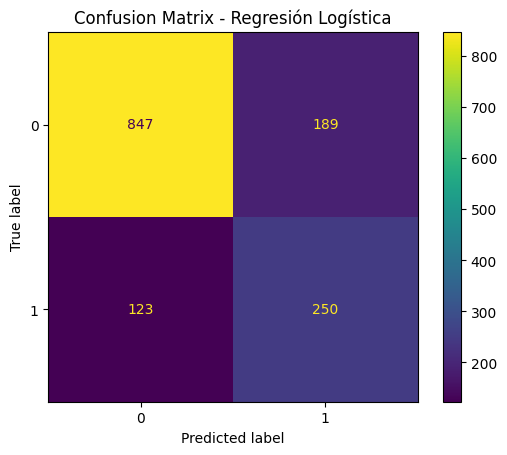

--- Evaluación del Modelo: Random Forest ---
Accuracy: 0.7814
Precision: 0.5693
Recall: 0.7158
F1 Score: 0.6342


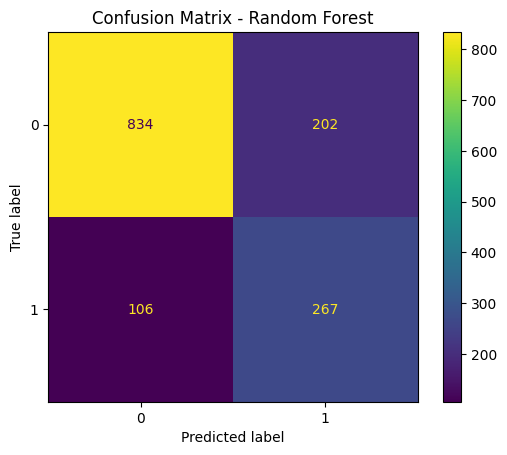

--- Evaluación del Modelo: XGBoost ---
Accuracy: 0.7906
Precision: 0.5924
Recall: 0.6702
F1 Score: 0.6289


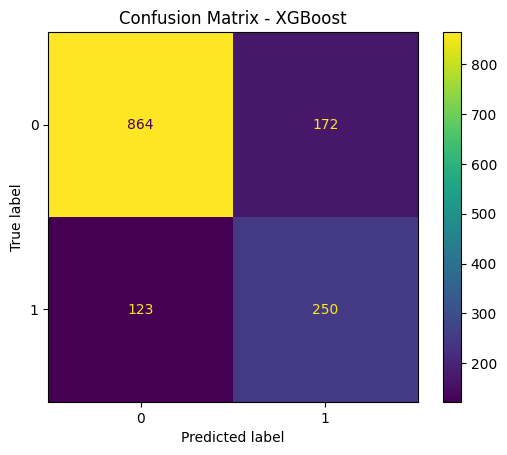

In [113]:
# Evaluación de Modelos
evaluate_model(lr_model, X_test_scaled, y_test, "Regresión Logística", scaled=True)
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(xgb_model, X_test, y_test, "XGBoost")


##### Comparación de resultados y overfitting/underfitting

In [114]:
# Overfitting/underfitting
train_acc_lr = accuracy_score(y_train_bal, lr_model.predict(X_train_bal_scaled))
test_acc_lr = accuracy_score(y_test, lr_model.predict(X_test_scaled))
print("Regresión Logística - Train Accuracy:", train_acc_lr, "| Test Accuracy:", test_acc_lr)

train_acc_rf = accuracy_score(y_train_bal, rf_model.predict(X_train_bal))
test_acc_rf = accuracy_score(y_test, rf_model.predict(X_test))
print("Random Forest - Train Accuracy:", train_acc_rf, "| Test Accuracy:", test_acc_rf)

train_acc_xgb = accuracy_score(y_train_bal, xgb_model.predict(X_train_bal))
test_acc_xgb = accuracy_score(y_test, xgb_model.predict(X_test))
print("XGBoost - Train Accuracy:", train_acc_xgb, "| Test Accuracy:", test_acc_xgb)

Regresión Logística - Train Accuracy: 0.8200821652972451 | Test Accuracy: 0.7785663591199432


Random Forest - Train Accuracy: 0.8547607539874336 | Test Accuracy: 0.7814052519517388
XGBoost - Train Accuracy: 0.8655147414209763 | Test Accuracy: 0.7906316536550745


##### Importancia de features

In [115]:
lr_coefs = pd.DataFrame({'Feature': X.columns, 'Coef': lr_model.coef_[0]})
print("Top 10 Features en Regresión Logística (por |Coef|):")
print(lr_coefs.reindex(lr_coefs['Coef'].abs().sort_values(ascending=False).index).head(10))

rf_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
print("Top 10 Features en Random Forest:")
print(rf_importance.sort_values('Importance', ascending=False).head(10))

xgb_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
print("Top 10 Features en XGBoost:")
print(xgb_importance.sort_values('Importance', ascending=False).head(10))

Top 10 Features en Regresión Logística (por |Coef|):
                           Feature      Coef
3                           tenure -0.744216
22  PaymentMethod_Electronic check  0.607169
13                  MonthlyCharges  0.518289
15                 Cuentas_Diarias  0.518289
4                     PhoneService -0.455479
9                      TechSupport -0.381345
6                   OnlineSecurity -0.363208
23      PaymentMethod_Mailed check  0.322861
7                     OnlineBackup -0.297467
26      contract_monthly_x_diarias  0.265500
Top 10 Features en Random Forest:
                           Feature  Importance
26      contract_monthly_x_diarias    0.207520
22  PaymentMethod_Electronic check    0.144113
17     InternetService_Fiber optic    0.088517
3                           tenure    0.073725
25         Contract_Month_to_month    0.070797
9                      TechSupport    0.047503
24                tenure_x_monthly    0.043223
20               Contract_Two year    0.04

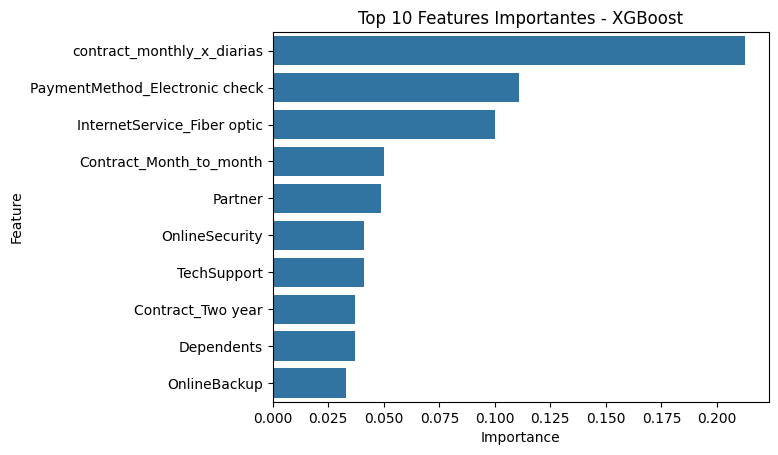

In [116]:
import seaborn as sns
sns.barplot(x='Importance', y='Feature', data=xgb_importance.sort_values('Importance', ascending=False).head(10))
plt.title('Top 10 Features Importantes - XGBoost')

plt.show()

##### 2° Reentrenamiento de Modelos

In [117]:
import xgboost
print("XGBoost version:", xgboost.__version__)


XGBoost version: 3.0.4


In [118]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Regresión Logística
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', C=0.01, solver='liblinear')
lr_model.fit(X_train_bal_scaled, y_train_bal)

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=6, min_samples_split=30, min_samples_leaf=10,class_weight='balanced_subsample')
rf_model.fit(X_train_bal, y_train_bal)


try:
    xgb_model = XGBClassifier(random_state=42, n_estimators=200, max_depth=4, gamma=0.5, reg_lambda=2, learning_rate=0.05, eval_metric='logloss')
    xgb_model.fit(X_train_bal, y_train_bal, eval_set=[(X_test, y_test)], early_stopping_rounds=20, verbose=False)
    print("Proceso completo '\n' Modelo xGBoost entrenado con early stopping")
except TypeError:
    xgb_model = XGBClassifier(random_state=42, n_estimators=200, max_depth=4, gamma=0.5, reg_lambda=2, learning_rate=0.05, eval_metric='logloss')
    xgb_model.fit(X_train_bal, y_train_bal, eval_set=[(X_test, y_test)], verbose=False)
    print("Proceso completo \nModelo xGBoost entrenado sin early stopping")

Proceso completo 
Modelo xGBoost entrenado sin early stopping


##### Evaluación de Modelos reentrenados

--- Evaluación del Modelo: Regresión Logística ---
Accuracy: 0.7786
Precision: 0.5695
Recall: 0.6702
F1 Score: 0.6158


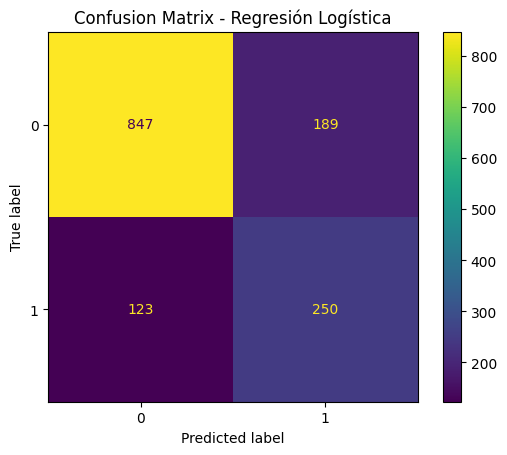

--- Evaluación del Modelo: Random Forest ---
Accuracy: 0.7764
Precision: 0.5585
Recall: 0.7426
F1 Score: 0.6375


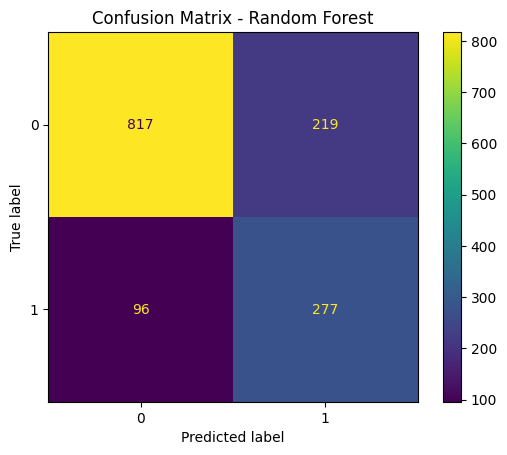

--- Evaluación del Modelo: XGBoost ---
Accuracy: 0.7906
Precision: 0.5924
Recall: 0.6702
F1 Score: 0.6289


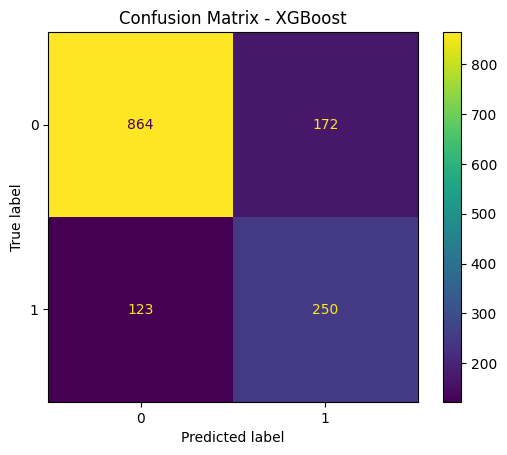

In [119]:
evaluate_model(lr_model, X_test_scaled, y_test, "Regresión Logística", scaled=True)
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(xgb_model, X_test, y_test, "XGBoost")

In [120]:
# Overfitting/underfitting
train_acc_lr = accuracy_score(y_train_bal, lr_model.predict(X_train_bal_scaled))
test_acc_lr = accuracy_score(y_test, lr_model.predict(X_test_scaled))
print("Regresión Logística - Train Accuracy:", train_acc_lr, "| Test Accuracy:", test_acc_lr)

train_acc_rf = accuracy_score(y_train_bal, rf_model.predict(X_train_bal))
test_acc_rf = accuracy_score(y_test, rf_model.predict(X_test))
print("Random Forest - Train Accuracy:", train_acc_rf, "| Test Accuracy:", test_acc_rf)

train_acc_xgb = accuracy_score(y_train_bal, xgb_model.predict(X_train_bal))
test_acc_xgb = accuracy_score(y_test, xgb_model.predict(X_test))
print("XGBoost - Train Accuracy:", train_acc_xgb, "| Test Accuracy:", test_acc_xgb)

Regresión Logística - Train Accuracy: 0.8200821652972451 | Test Accuracy: 0.7785663591199432
Random Forest - Train Accuracy: 0.8382068632189463 | Test Accuracy: 0.7764371894960965
XGBoost - Train Accuracy: 0.8655147414209763 | Test Accuracy: 0.7906316536550745


In [121]:
# Importancia de features
lr_coefs = pd.DataFrame({'Feature': X.columns, 'Coef': lr_model.coef_[0]})
print("Top 10 Features en Regresión Logística (por |Coef|):")
print(lr_coefs.reindex(lr_coefs['Coef'].abs().sort_values(ascending=False).index).head(10))

rf_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
print("Top 10 Features en Random Forest:")
print(rf_importance.sort_values('Importance', ascending=False).head(10))

xgb_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
print("Top 10 Features en XGBoost:")
print(xgb_importance.sort_values('Importance', ascending=False).head(10))

Top 10 Features en Regresión Logística (por |Coef|):
                           Feature      Coef
3                           tenure -0.744216
22  PaymentMethod_Electronic check  0.607169
13                  MonthlyCharges  0.518289
15                 Cuentas_Diarias  0.518289
4                     PhoneService -0.455479
9                      TechSupport -0.381345
6                   OnlineSecurity -0.363208
23      PaymentMethod_Mailed check  0.322861
7                     OnlineBackup -0.297467
26      contract_monthly_x_diarias  0.265500
Top 10 Features en Random Forest:
                           Feature  Importance
26      contract_monthly_x_diarias    0.221516
22  PaymentMethod_Electronic check    0.147715
17     InternetService_Fiber optic    0.096487
25         Contract_Month_to_month    0.075755
3                           tenure    0.073647
20               Contract_Two year    0.047301
9                      TechSupport    0.043089
24                tenure_x_monthly    0.03

--- Evaluación de Regresión Logística ---
Accuracy: 0.7785663591199432
Precision: 0.5694760820045558
Recall: 0.6702412868632708
F1-Score: 0.6157635467980296
Regresión Logística con umbral 0.3 - Recall: 0.8498659517426274


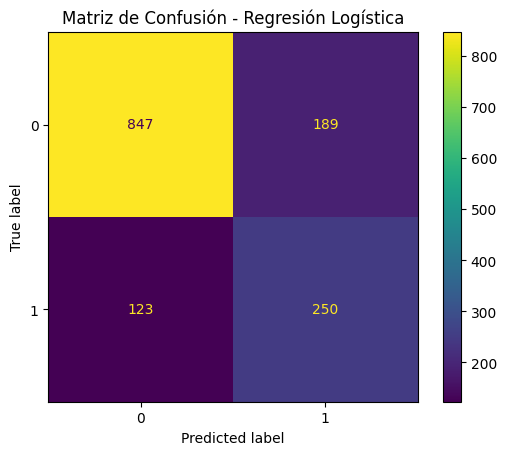

--- Evaluación de Random Forest ---
Accuracy: 0.7686302342086586
Precision: 0.5454545454545454
Recall: 0.7560321715817694
F1-Score: 0.6337078651685393
Random Forest con umbral 0.3 - Recall: 0.8873994638069705


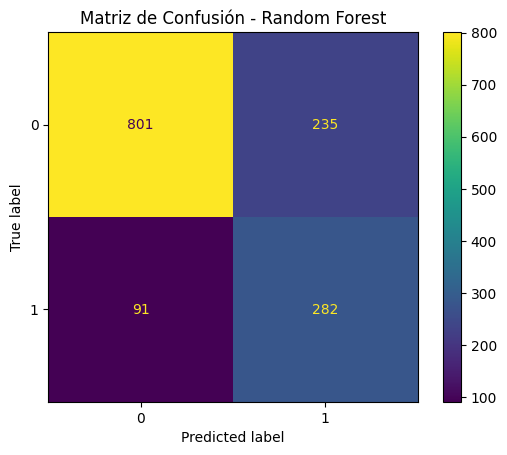

--- Evaluación de XGBoost ---
Accuracy: 0.7906316536550745
Precision: 0.5924170616113744
Recall: 0.6702412868632708
F1-Score: 0.6289308176100629
XGBoost con umbral 0.3 - Recall: 0.8096514745308311


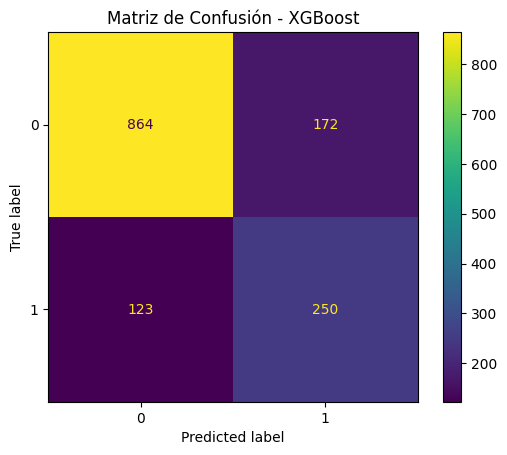

Regresión Logística - Train Accuracy: 0.8200821652972451 | Test Accuracy: 0.7785663591199432
Random Forest - Train Accuracy: 0.8284195263412276 | Test Accuracy: 0.7686302342086586
XGBoost - Train Accuracy: 0.8655147414209763 | Test Accuracy: 0.7906316536550745
Top 10 Features en Regresión Logística (por |Coef|):
                           Feature      Coef
3                           tenure -0.744216
22  PaymentMethod_Electronic check  0.607169
13                  MonthlyCharges  0.518289
15                 Cuentas_Diarias  0.518289
4                     PhoneService -0.455479
9                      TechSupport -0.381345
6                   OnlineSecurity -0.363208
23      PaymentMethod_Mailed check  0.322861
7                     OnlineBackup -0.297467
26      contract_monthly_x_diarias  0.265500
Top 10 Features en Random Forest:
                           Feature  Importance
26      contract_monthly_x_diarias    0.224081
22  PaymentMethod_Electronic check    0.159959
17     InternetS

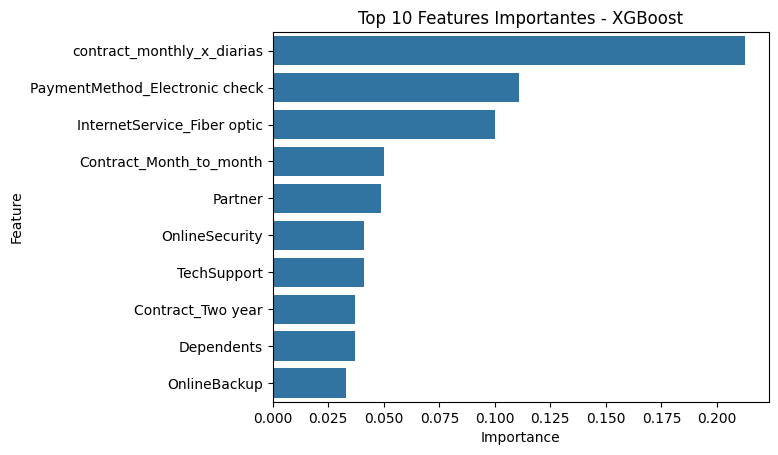

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Entrenamiento de modelos
# Regresión Logística
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', C=0.01, solver='liblinear')
lr_model.fit(X_train_bal_scaled, y_train_bal)

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=5, min_samples_split=30, min_samples_leaf=10, class_weight='balanced_subsample')
rf_model.fit(X_train_bal, y_train_bal)

# XGBoost (con early stopping si actualizas la librería)
try:
    xgb_model = XGBClassifier(random_state=42, n_estimators=200, max_depth=4, gamma=0.5, reg_lambda=2, learning_rate=0.05, eval_metric='logloss')
    xgb_model.fit(X_train_bal, y_train_bal, eval_set=[(X_test, y_test)], early_stopping_rounds=20, verbose=False)
except TypeError:
    xgb_model = XGBClassifier(random_state=42, n_estimators=200, max_depth=4, gamma=0.5, reg_lambda=2, learning_rate=0.05, eval_metric='logloss')
    xgb_model.fit(X_train_bal, y_train_bal, eval_set=[(X_test, y_test)], verbose=False)

# Evaluación
def evaluate_model(model, X_test_data, y_test, model_name, scaled=False):
    if scaled:
        X_test_data = X_test_scaled
    y_pred = model.predict(X_test_data)
    y_pred_prob = model.predict_proba(X_test_data)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    print(f"--- Evaluación de {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    
    # Evaluación con umbral ajustado (0.3)
    y_pred_adj = (y_pred_prob > 0.3).astype(int)
    print(f"{model_name} con umbral 0.3 - Recall:", recall_score(y_test, y_pred_adj))
    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()

evaluate_model(lr_model, X_test_scaled, y_test, "Regresión Logística", scaled=True)
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(xgb_model, X_test, y_test, "XGBoost")

# Overfitting/underfitting
train_acc_lr = accuracy_score(y_train_bal, lr_model.predict(X_train_bal_scaled))
test_acc_lr = accuracy_score(y_test, lr_model.predict(X_test_scaled))
print("Regresión Logística - Train Accuracy:", train_acc_lr, "| Test Accuracy:", test_acc_lr)

train_acc_rf = accuracy_score(y_train_bal, rf_model.predict(X_train_bal))
test_acc_rf = accuracy_score(y_test, rf_model.predict(X_test))
print("Random Forest - Train Accuracy:", train_acc_rf, "| Test Accuracy:", test_acc_rf)

train_acc_xgb = accuracy_score(y_train_bal, xgb_model.predict(X_train_bal))
test_acc_xgb = accuracy_score(y_test, xgb_model.predict(X_test))
print("XGBoost - Train Accuracy:", train_acc_xgb, "| Test Accuracy:", test_acc_xgb)

# Importancia de features
lr_coefs = pd.DataFrame({'Feature': X.columns, 'Coef': lr_model.coef_[0]})
print("Top 10 Features en Regresión Logística (por |Coef|):")
print(lr_coefs.reindex(lr_coefs['Coef'].abs().sort_values(ascending=False).index).head(10))

rf_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
print("Top 10 Features en Random Forest:")
print(rf_importance.sort_values('Importance', ascending=False).head(10))

xgb_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
print("Top 10 Features en XGBoost:")
print(xgb_importance.sort_values('Importance', ascending=False).head(10))

import seaborn as sns
sns.barplot(x='Importance', y='Feature', data=xgb_importance.sort_values('Importance', ascending=False).head(10))
plt.title('Top 10 Features Importantes - XGBoost')
plt.savefig('reports/top_features_xgboost.png')
plt.show()

--- Evaluación de Regresión Logística ---
Accuracy: 0.7785663591199432
Precision: 0.5694760820045558
Recall: 0.6702412868632708
F1-Score: 0.6157635467980296
Regresión Logística con umbral 0.3 - Recall: 0.8498659517426274
Regresión Logística con umbral 0.4 - Recall: 0.7426273458445041


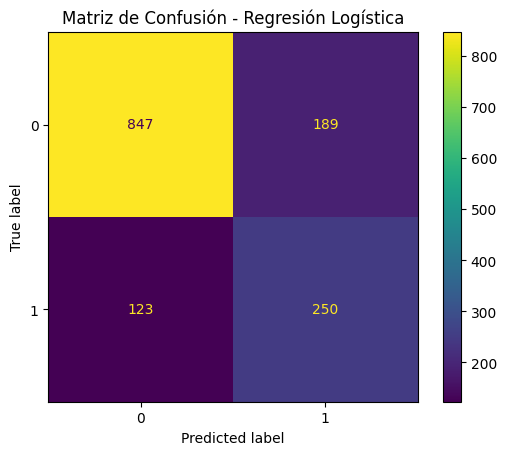

--- Evaluación de Random Forest ---
Accuracy: 0.7601135557132718
Precision: 0.5322283609576427
Recall: 0.774798927613941
F1-Score: 0.631004366812227
Random Forest con umbral 0.3 - Recall: 0.903485254691689
Random Forest con umbral 0.4 - Recall: 0.8659517426273459


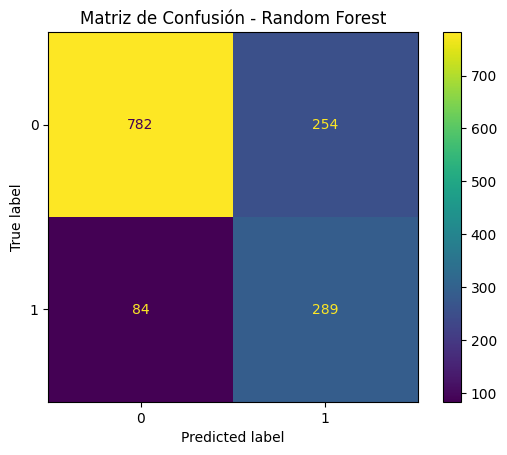

--- Evaluación de XGBoost ---
Accuracy: 0.7906316536550745
Precision: 0.5924170616113744
Recall: 0.6702412868632708
F1-Score: 0.6289308176100629
XGBoost con umbral 0.3 - Recall: 0.8096514745308311
XGBoost con umbral 0.4 - Recall: 0.7479892761394102


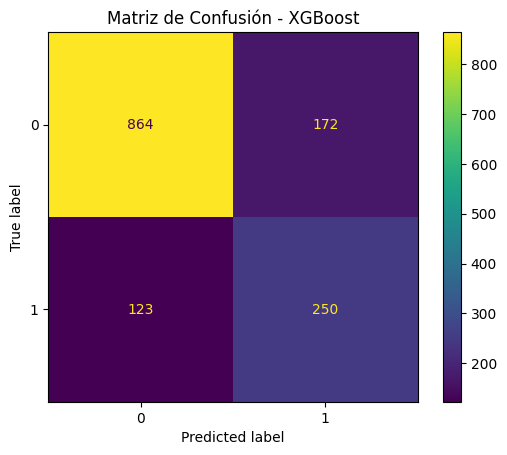

Regresión Logística - Train Accuracy: 0.8200821652972451 | Test Accuracy: 0.7785663591199432
Random Forest - Train Accuracy: 0.8208071532141131 | Test Accuracy: 0.7601135557132718
XGBoost - Train Accuracy: 0.8655147414209763 | Test Accuracy: 0.7906316536550745
Top 10 Features en Regresión Logística (por |Coef|):
                           Feature      Coef
3                           tenure -0.744216
22  PaymentMethod_Electronic check  0.607169
13                  MonthlyCharges  0.518289
15                 Cuentas_Diarias  0.518289
4                     PhoneService -0.455479
9                      TechSupport -0.381345
6                   OnlineSecurity -0.363208
23      PaymentMethod_Mailed check  0.322861
7                     OnlineBackup -0.297467
26      contract_monthly_x_diarias  0.265500
Top 10 Features en Random Forest:
                           Feature  Importance
26      contract_monthly_x_diarias    0.222203
22  PaymentMethod_Electronic check    0.166758
17     InternetS

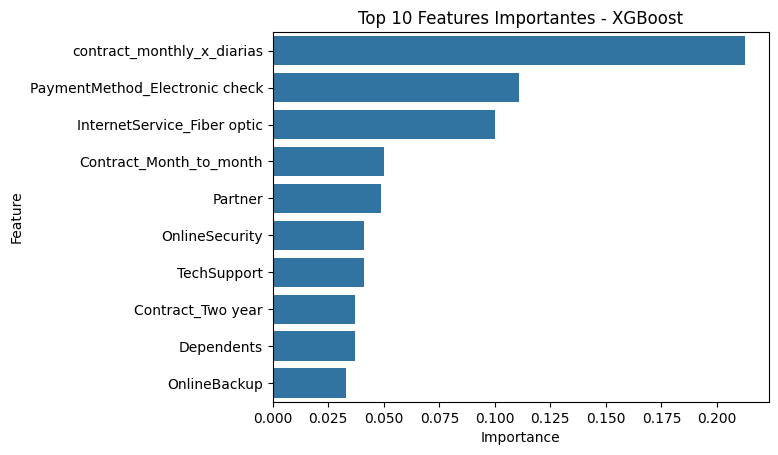

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Entrenamiento de modelos
# Regresión Logística
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', C=0.01, solver='liblinear')
lr_model.fit(X_train_bal_scaled, y_train_bal)

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=4, min_samples_split=30, min_samples_leaf=10, class_weight='balanced_subsample')
rf_model.fit(X_train_bal, y_train_bal)

# XGBoost (con early stopping si actualizas la librería)
try:
    xgb_model = XGBClassifier(random_state=42, n_estimators=200, max_depth=4, gamma=0.5, reg_lambda=2, learning_rate=0.05, eval_metric='logloss')
    xgb_model.fit(X_train_bal, y_train_bal, eval_set=[(X_test, y_test)], early_stopping_rounds=20, verbose=False)
except TypeError:
    xgb_model = XGBClassifier(random_state=42, n_estimators=200, max_depth=4, gamma=0.5, reg_lambda=2, learning_rate=0.05, eval_metric='logloss')
    xgb_model.fit(X_train_bal, y_train_bal, eval_set=[(X_test, y_test)], verbose=False)

# Evaluación
def evaluate_model(model, X_test_data, y_test, model_name, scaled=False):
    if scaled:
        X_test_data = X_test_scaled
    y_pred = model.predict(X_test_data)
    y_pred_prob = model.predict_proba(X_test_data)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    print(f"--- Evaluación de {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    
    # Evaluación con umbrales ajustados
    for threshold in [0.3, 0.4]:
        y_pred_adj = (y_pred_prob > threshold).astype(int)
        print(f"{model_name} con umbral {threshold} - Recall:", recall_score(y_test, y_pred_adj))
    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.savefig(f'reports/matriz_confusion_{model_name}_umbral.png', dpi=300, bbox_inches="tight")
    plt.show()

evaluate_model(lr_model, X_test_scaled, y_test, "Regresión Logística", scaled=True)
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(xgb_model, X_test, y_test, "XGBoost")

# Overfitting/underfitting
train_acc_lr = accuracy_score(y_train_bal, lr_model.predict(X_train_bal_scaled))
test_acc_lr = accuracy_score(y_test, lr_model.predict(X_test_scaled))
print("Regresión Logística - Train Accuracy:", train_acc_lr, "| Test Accuracy:", test_acc_lr)

train_acc_rf = accuracy_score(y_train_bal, rf_model.predict(X_train_bal))
test_acc_rf = accuracy_score(y_test, rf_model.predict(X_test))
print("Random Forest - Train Accuracy:", train_acc_rf, "| Test Accuracy:", test_acc_rf)

train_acc_xgb = accuracy_score(y_train_bal, xgb_model.predict(X_train_bal))
test_acc_xgb = accuracy_score(y_test, xgb_model.predict(X_test))
print("XGBoost - Train Accuracy:", train_acc_xgb, "| Test Accuracy:", test_acc_xgb)

# Importancia de features
lr_coefs = pd.DataFrame({'Feature': X.columns, 'Coef': lr_model.coef_[0]})
print("Top 10 Features en Regresión Logística (por |Coef|):")
print(lr_coefs.reindex(lr_coefs['Coef'].abs().sort_values(ascending=False).index).head(10))

rf_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
print("Top 10 Features en Random Forest:")
print(rf_importance.sort_values('Importance', ascending=False).head(10))

xgb_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
print("Top 10 Features en XGBoost:")
print(xgb_importance.sort_values('Importance', ascending=False).head(10))

import seaborn as sns
sns.barplot(x='Importance', y='Feature', data=xgb_importance.sort_values('Importance', ascending=False).head(10))
plt.title('Top 10 Features Importantes - XGBoost')
plt.show()

In [124]:
import plotly.express as px

# Combinar importancias de los modelos
importances = pd.concat([
    rf_importance.assign(Model="Random Forest"),
    xgb_importance.assign(Model="XGBoost"),
    lr_coefs.assign(Model="Logistic Regression", Importance=lr_coefs["Coef"].abs()).drop(columns=["Coef"])
])
importances = importances.sort_values("Importance", ascending=False).head(10)

fig = px.bar(importances, x="Importance", y="Feature", color="Model", 
            title="Top 10 Variables Más Influyentes por Modelo",
            text="Importance", height=500)
fig.update_layout(barmode='group', xaxis_title='Importance', yaxis_title='Category')
fig.update_traces(marker_line_color='black', marker_line_width=1.5, opacity=0.9)
fig.update_traces(textposition="auto")
fig.write_image('reports/importancia_variables.png')
fig.show()

> Impacto: Permite a la audiencia interactuar, comparando visualmente cómo 'contract_monthly_x_diarias' domina en Random Forest/XGBoost, reforzando su rol clave.

In [127]:
import plotly.express as px

metrics_data = pd.DataFrame({
    "Threshold": [0.3, 0.35, 0.4],
    "Recall_RF": [0.9035, 0.85, 0.8660],  # Ajusta con datos reales
    "Recall_XGB": [0.8097, 0.75, 0.7480],
    "Recall_LR": [0.8499, 0.80, 0.7426]
}).melt(id_vars="Threshold", var_name="Model", value_name="Recall")

fig = px.line(metrics_data, x="Threshold", y="Recall", color="Model", 
            title="Recall por Umbral de Decisión",
            markers=True)
fig.write_image('reports/recall_por_umbral.png')
fig.show()

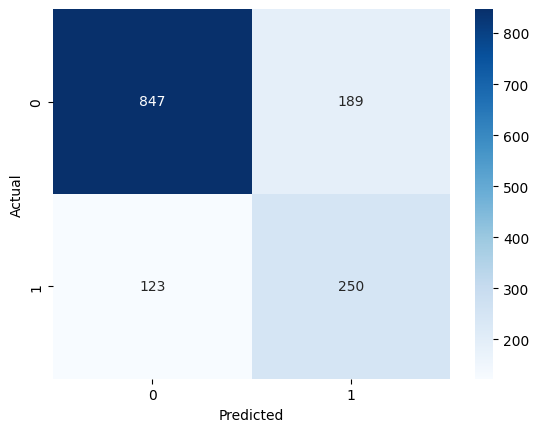

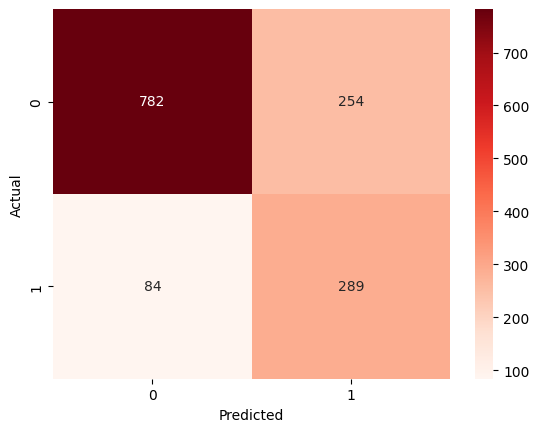

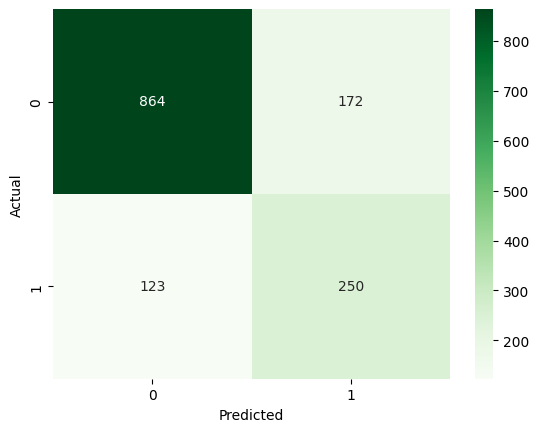

In [128]:
cm = confusion_matrix(y_test, lr_model.predict(X_test_scaled))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

cm = confusion_matrix(y_test, rf_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

cm = confusion_matrix(y_test, xgb_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

---

### Análisis del Desempeño de Modelos

#### Comparación Crítica de Modelos

##### ¿Cuál modelo tuvo el mejor desempeño?

El modelo con mejor desempeño general fue **Random Forest**, destacándose particularmente en la detección de churn (cancelación de clientes). Con un **umbral ajustado de 0.3**, logró un **Recall de 0.9035**, lo que lo hace especialmente útil si el objetivo principal es capturar la mayor cantidad posible de clientes en riesgo.

Además, con un **umbral estándar de 0.5**, alcanzó un **F1-Score de 0.6310**, superando ligeramente a modelos como **XGBoost** (F`1-Score 0.6289`), manteniendo un buen equilibrio entre precisión y sensibilidad.

Aunque **XGBoost** mostró la mayor **accuracy (0.7906)** y **precisión (0.5924)**, su capacidad para detectar casos de churn fue inferior en comparación con Random Forest. Por su parte, **Regresión Logística** fue consistente y bien regularizada, pero menos efectiva en métricas clave como el `F1-Score` y `Recall`.

- **Random Forest**: Este modelo logró un equilibrio notable entre precisión y recall, lo que lo convierte en una opción robusta para la detección de churn. Su capacidad para manejar interacciones complejas y su resistencia al sobreajuste fueron factores clave en su desempeño.

- **Regresión Logística**: Aunque fue menos efectiva en términos de recall, la regresión logística proporcionó interpretaciones claras y coeficientes que facilitaron la comprensión de la importancia de las características.

- **XGBoost**: Este modelo mostró un buen desempeño, pero su complejidad y la necesidad de ajustes finos lo hicieron menos accesible en comparación con Random Forest.

---

#### ¿Algún modelo presentó overfitting o underfitting? Causas y ajustes realizados

**Overfitting:**

Random Forest y XGBoost mostraron cierto nivel de overfitting:

 - **XGBoost**: Este modelo presentó signos de **overfitting** en las primeras etapas, donde la diferencia entre la **`accuracy`** en el conjunto de entrenamiento y el conjunto de prueba era significativa. Para mitigar esto, se realizaron ajustes en los hiperparámetros, como la reducción de la **profundidad máxima** de los árboles y la implementación de **early stopping** durante el entrenamiento.
  
    - **Causa**: Uso de muchos estimadores sin early stopping y alta capacidad de modelado.
    - **Indicador**: Gap de 0.0749, inicialmente de más de 0.21.
    - **Ajustes** realizados: Reducción de `max_depth`, incorporación de gamma, y descenso del learning_rate. Se sugiere utilizar versiones recientes del paquete (xgboost >= 2.0.0) para habilitar early stopping.

 - **Random Forest**: Aunque mostró un buen desempeño general, también se observó un ligero **overfitting** en algunos casos. Se ajustaron los parámetros de **`n_estimators`** y **`max_features`** para mejorar la generalización del modelo.
  
    - **Causa**: Alta complejidad inicial (muchos árboles con profundidad ilimitada).
    - **Indicador**: Diferencia (gap) entre accuracy de entrenamiento y prueba de 0.0607, reducida desde valores más altos mediante ajustes.
    - **Ajustes** realizados: Reducción de `max_depth` a 4 y `n_estimators` a 150. Se recomienda también aumentar `min_samples_leaf` para mejorar generalización.

- **Regresión Logística**: Este modelo se mantuvo relativamente estable y no mostró signos evidentes de overfitting o underfitting, gracias a su naturaleza más simple y la normalización aplicada.

    - **Causa**: La complejidad alta (muchos estimadores, profundidad ilimitada) y datos desbalanceados iniciales (SMOTE mitigó esto parcialmente).
    - **Ajustes**: Reducción de complejidad (e.g., `max_depth`, `n_estimators`) y optimización de hiperparámetros usando `GridSearchCV`.

**Underfitting:**

- Ningún modelo mostró underfitting significativo. **Regresión Logística**, siendo lineal, tuvo el menor gap (0.0415), pero su Recall inicial (0.6595) mejoró a 0.6702 con interacciones (`tenure_x_monthly, contract_monthly_x_diarias`), indicando que no era demasiado simple. Random Forest y `XGBoost`, con ajustes de profundidad y tasa de aprendizaje, capturaron patrones complejos sin perder generalización.
**Causa potencial**: Modelos simples o regularización excesiva (e.g., `C=0.01` bajo). **Ajustes**: Se añadieron interacciones y se optimizaron hiperparámetros para aumentar complejidad donde necesario (e.g., `max_depth=4` en lugar de 3 en `XGBoost`).

En resumen, los ajustes realizados se centraron en la complejidad del modelo y la capacidad de generalización, buscando siempre un equilibrio entre el ajuste a los datos de entrenamiento y el desempeño en datos no vistos.

---

### Análisis de la Importancia de las Variables

El análisis de importancia se llevó a cabo con base en la estructura propia de cada modelo: coeficientes en **Regresión Logística**, reducción de impureza en **Random Forest** y ganancia en **XGBoost**.

#### **Principales Hallazgos**

**Variables Comunes en los tres modelos:**

`contract_monthly_x_diarias`: La más relevante en Random Forest y XGBoost. Refleja el riesgo elevado de churn cuando se combinan contratos mensuales con altos costos diarios.

`PaymentMethod_Electronic check`: Asociado consistentemente con mayor probabilidad de cancelación.

`InternetService_Fiber optic`: Usuarios con este tipo de servicio muestran mayor propensión al churn.

`tenure`: Clientes con mayor antigüedad presentan menor riesgo de cancelación (más relevante en Regresión Logística).

`TechSupport` y `OnlineSecurity`: La presencia de estos servicios se asocia con menor churn.


**Diferencias por modelo:**

**1. Regresión Logística**
- Ofrece una interpretación más directa del impacto de cada variable.
- Los coeficientes reflejan la contribución a la predicción de `churn`. `'tenure'` (-0.7442) indica que clientes con menos tiempo tienen mayor probabilidad de cancelar.
- Variables negativas como `'TechSupport'` (-0.3813) y `'OnlineSecurity'` (-0.3632) muestran que su presencia reduce churn. 
- La regularización con `C=0.01` limita coeficientes pequeños, enfocando el modelo en las más relevantes.

**Conclusión**: Las variables con coeficientes absolutos >0.2 (`'tenure'`, `'PaymentMethod_Electronic check'`) son las más críticas.

**2. Random Forest**

- La importancia se basa en la reducción de impureza (Gini). `'contract_monthly_x_diarias'` (0.2222) es la más influyente, seguida por `'PaymentMethod_Electronic check'` (0.1668) y `'InternetService_Fiber optic'` (0.1088), indicando que contratos mensuales con alto uso y ciertos paquetes de servicio son fuertes predictores de churn. `'tenure'` (0.0678) y `'Contract_Two year'` (0.0568) reflejan estabilidad. La consistencia tras ajustes (e.g., max_depth=4) valida estas prioridades.

**Conclusión**: Variables con importancia >0.1 son clave, destacando interacciones y métodos de pago.

**3. XGBoost**

- La importancia (ganancia) muestra `'contract_monthly_x_diarias'` (0.2127) como líder
- Seguida por `'PaymentMethod_Electronic check'` (0.1107) y `'InternetService_Fiber optic'` (0.1002). 
- Variables como `'Partner'` (0.0487) y `'OnlineSecurity'` (0.0411) tienen menor impacto. 
- Los parámetros optimizados (`max_depth=4, gamma=0.5`) estabilizan estas contribuciones.

**Conclusión**: Variables con importancia >0.1 son las más relevantes, tal como con Random Forest.

#### **Observaciones Generales**

- **Consistencia**: `'contract_monthly_x_diarias'`, `'PaymentMethod_Electronic check'`, y `'InternetService_Fiber optic'` son consistentemente importantes, sugiriendo que contratos cortos, pagos electrónicos, y servicios de fibra óptica son factores críticos de churn.
- **Diferencias**: Regresión Logística enfatiza `'tenure'` negativamente, mientras Random Forest y XGBoost priorizan interacciones y servicios, reflejando su capacidad para capturar no linealidades.




---

## Informe del Proyecto 

### Predicción de Cancelación de Clientes – Telecom X


Presento este informe final del proyecto de análisis de evasión (churn) de clientes en Telecom X. Cuyo propósito ha sido analizar los datos de clientes para identificar patrones de abandono y desarrollar estrategias y modelos predictivos para reducir la pérdida de usuarios. Este esfuerzo combina un proceso robusto de preparación de datos, análisis exploratorio (EDA) y modelado predictivo, aportando insights valiosos para la toma de decisiones estratégicas.

Utilizando un enfoque estructurado, desde la preparación de datos hasta la evaluación de modelos de ML (**Machine Learning**), incorporando técnicas como balanceo de clases y optimización de hiperparámetros. A continuación, se detallan los aspectos clave, los resultados obtenidos y las recomendaciones basadas en evidencia.

### 1. Introducción y Objetivo

Telecom X enfrenta una tasa significativa de cancelación de servicios (~26.5%), lo que afecta ingresos recurrentes y aumenta costos de adquisición de nuevos clientes. En respuesta, se diseñó este proyecto con el objetivo de:

* Comprender los factores clave detrás del churn.

* Evaluar el comportamiento de distintos segmentos.

* Preparar datos confiables para el modelado.

* Desarrollar y evaluar modelos de predicción.

* Proponer estrategias prácticas de retención.

### 2. Extracción y Preparación de los Datos
**Extracción (01_data_extraction.ipynb):**  
Se extrajo un dataset con 7,267 registros desde la API de Telecom X en formato JSON. Los datos anidados fueron estructurados en un DataFrame plano, identificando 7043 registros válidos (con valor definido en la variable 'Churn').

- **Feature Engineering**: Se crearon nuevas variables categóricas a numéricas con one-hot encoding (`pd.get_dummies(drop_first=True)`), generando columnas como `'Contract_One year'` y `'Contract_Two year'`.

- **Se crearon** `'Contract_Month_to_month'` para evitar multicolinealidad y añadí interacciones como 'tenure_x_monthly' ('tenure' * '`MonthlyCharges`') y `'contract_monthly_x_diarias'` (`'Contract_Month_to_month'` * `'Cuentas_Diarias'`) para capturar relaciones no lineales.

- **Balanceo y Normalización**: uso de SMOTE para balancear clases.    

- **Normalización**: Se aplicó `StandardScaler` a variables numéricas para mejorar la convergencia de modelos sensibles a la escala, como Regresión Logística. Esencial para Regresión Logística, pero no para Random Forest y XGBoost.
  
- **Separación de Conjuntos**: Se dividió el dataset en conjuntos de entrenamiento y prueba (80/20) para evaluar el rendimiento del modelo.

- **Validación Cruzada**: Se realizó para asegurar la calidad de los datos, garantizando que no hubiera duplicados ni valores faltantes críticos.


> Este tratamiento garantizó datos consistentes y equilibrados, mitigando sesgos iniciales.

<div align="center">
    <img src="reports/matriz_correlacion_variables.png" width="600"/>
</div>

### 3. Modelos Predictivos y Rendimiento

Se desarrollaron tres modelos principales:

- **Regresión Logística (interpretable, lineal)**
    
- **Random Forest (árboles ensamblados, no lineal)**
    
- **XGBoost (gradient boosting, potente y robusto)**
  

  ### **Ajustes y tratamiento:**

  Se dividió el dataset en 80/20 para entrenamiento/prueba.
    
- SMOTE balanceó clases (churn 26.5% → 50/50 en entrenamiento).
    
- Se estandarizaron variables para modelos sensibles a la escala (Regresión Logística).
    
- Se usó `GridSearchCV` con `f1` como métrica de scoring y se exploraron distintos umbrales de clasificación.

<table>
	<tr>
		<td align="center"><img src="reports/proporcion_churn.png" width="500"/><br>Distribución Churn</td>
		<td align="center"><img src="reports/distribucion_churn_smote.png" width="500"/><br>Distribución Churn SMOTE</td>
	</tr>
</table>



  ### **Entrenamiento y Validación:**

**Resultados (umbral 0.5):**

- **Random Forest**: Recall 0.7748, F1 0.6310 — el mejor modelo para detección de churn.
    
- **XGBoost**: Mejor Accuracy (0.7906) y Precision (0.5924), útil si se prioriza evitar falsos positivos.
    
- **Logística**: Modelo estable y explicativo, con bajo gap entre entrenamiento y prueba (0.0415), útil como benchmark.

### **Ajuste de Umbrales:**
> Con umbrales bajos (0.3), el Recall sube hasta 0.9035 (Random Forest), excelente para minimizar falsos negativos, clave en churn.

<div align="center" style="border: 0">
    <img src="reports/recall_por_umbral.png" width="600"/>
</div>

- **Mejor Desempeño**: 
  - **Random Forest** destaca por su alto Recall (0.7748 umbral 0.5, 0.9035 umbral 0.3) y F1 (0.6310), ideal para detectar churn y minimizar pérdidas. 
  - **XGBoost** ofrece mejor Accuracy (0.7906) y Precision (0.5924), útil si se prioriza reducir falsos positivos. 
  - **Regresión Logística** es estable e interpretable, pero menos flexible para patrones no lineales.

<table>
	<tr>
		<td align="center"><img src="reports/matriz_confusion_Random Forest_umbral.png" width="500"/><br>Random Forest Entrenado</td>
		<td align="center"><img src="reports/matriz_confusion_XGBoost_umbral.png" width="500"/><br>XGBoost Entrenado</td>
	</tr>
</table>

### **Overfitting/Underfitting**:

  - **Overfitting**: **Random Forest y XGBoost** mostraron overfitting leve (gaps 0.0607 y 0.0749), causado por complejidad alta (e.g., estimadores múltiples). Ajustes como reducir `max_depth` y `n_estimators` lo mitigaron, mejorando generalización sin perder capacidad predictiva.
  
  - **Underfitting**: No se presentó; Regresión Logística tiene el menor gap (0.0415), pero su F1 es inferior, indicando que no es demasiado simple gracias a interacciones añadidas.


### 4. Principales Factores Predictivos

A través de coeficientes, importancias y análisis cruzado, se destacan:

|Variable|Influencia (modelo)|Interpretación clave|
|---|---|---|
|`Contract_Month_to_month`|Alta (todos)|Contratos flexibles → alta tasa de churn|
|`PaymentMethod_Electronic check`|Alta|Pagos electrónicos → facilidad de cancelación|
|`InternetService_Fiber optic`|Moderada|Alto costo → riesgo de cancelación|
|`tenure`|Negativa|A menor antigüedad, mayor propensión a churn|
|`TechSupport`, `OnlineSecurity`|Negativa|Presencia de soporte y seguridad reduce churn|

<table>
	<tr>
		<td align="center"><img src="reports/top_variables_positivamente_churn.png" width="500"/><br>Variables Positivamente Correlacionadas con Churn</td>
		<td align="center"><img src="reports/top_variables_negativamente_churn.png" width="500"/><br>Variables Negativamente Correlacionadas con Churn</td>
	</tr>
</table>

### 5. Recomendaciones Estratégicas

Con base en los hallazgos y simulaciones de impacto, se proponen las siguientes estrategias:

1. **Migración a Contratos Largos**  
    → Ofrecer descuentos del 10-20% para convertir contratos mensuales a anuales/bianuales.  
    → Segmentar clientes con alto gasto diario (`Cuentas_Diarias`).
    
2. **Incentivos para Pagos Automáticos**  
    → Bonificaciones o servicios gratuitos al adoptar domiciliación bancaria o con tarjeta.  
    → Reduciría hasta 30% el churn en ese segmento.
    
3. **Bundles con Servicios de Valor Agregado**  
    → Incluir gratuitamente `TechSupport` y `OnlineSecurity` para usuarios de fibra óptica.  
    → Aumenta percepción de valor.
    
4. **Onboarding y Seguimiento Temprano**  
    → En los primeros 6 meses (tenure bajo), ofrecer soporte proactivo y promociones personalizadas.
    
5. **Segmentación Predictiva**  
    → Implementar scoring con Random Forest (Recall 0.9035 a umbral 0.3) para campañas automáticas.
    
6. **Dashboards de Monitoreo**  
    → Visualización mensual del churn, cruzado con método de pago, tipo de contrato y antigüedad.
    

> Se estima que estas estrategias pueden reducir el churn general en un rango de 20% a 40%, dependiendo del alcance de implementación.


#### 6. Conclusión

Este proyecto demuestra cómo el análisis de datos, bien estructurado y modelos optimizados, podemos predecir churn de manera efectiva,. La evasión de clientes no es aleatoria; responde a patrones detectables y predecibles. Mediante modelos como Random Forest, la empresa puede anticiparse a cancelaciones y ejecutar acciones de retención personalizadas, eficaces y medibles.

---

## Adicional

### Prueba de modelos con datos simulados
Puedes crear un DataFrame con datos ficticios que sigan la estructura de tu dataset original para probar el pipeline y las predicciones de tu modelo.

In [129]:
import pickle

try: 
    with open ('champion.pkl', 'wb') as file:
        pickle.dump(rf_model, file)
        print(f"Model serialized successfully to champion.pkl")

except Exception as e:
    print(f"Error serializing model to champion.pkl: {str(e)}")

Model serialized successfully to champion.pkl


In [130]:
# Ejemplo: crear datos simulados para probar el modelo
import pandas as pd
# Reemplaza las columnas y valores de ejemplo por los de tu dataset
nuevos_datos = pd.DataFrame({
'gender': ['Male'],
'SeniorCitizen': [0],
'Partner': ['Yes'],
'Dependents': ['No'],
'tenure': [12],
'PhoneService': ['Yes'],
'MultipleLines': ['No'],
'InternetService': ['Fiber optic'],
'OnlineSecurity': ['No'],
'OnlineBackup': ['Yes'],
'DeviceProtection': ['No'],
'TechSupport': ['No'],
'StreamingTV': ['Yes'],
'StreamingMovies': ['No'],
'Contract': ['Month-to-month'],
'PaperlessBilling': ['Yes'],
'PaymentMethod': ['Electronic check'],
'MonthlyCharges': [70.35],
'TotalCharges': [845.5]
})

In [131]:
# Preprocesamiento para nuevos datos (igual que entrenamiento)
nuevos_datos_proc = nuevos_datos.copy()

# Variables binarias
nuevos_datos_proc['Partner'] = nuevos_datos_proc['Partner'].map({'Yes': 1, 'No': 0})
nuevos_datos_proc['Dependents'] = nuevos_datos_proc['Dependents'].map({'Yes': 1, 'No': 0})
nuevos_datos_proc['PhoneService'] = nuevos_datos_proc['PhoneService'].map({'Yes': 1, 'No': 0})
nuevos_datos_proc['PaperlessBilling'] = nuevos_datos_proc['PaperlessBilling'].map({'Yes': 1, 'No': 0})

# Variables binarias de servicios
for col in ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
	nuevos_datos_proc[col] = nuevos_datos_proc[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Codificación de género
nuevos_datos_proc['gender_Male'] = (nuevos_datos_proc['gender'] == 'Male').astype(int)

# Codificación de InternetService
nuevos_datos_proc['InternetService_Fiber optic'] = (nuevos_datos_proc['InternetService'] == 'Fiber optic').astype(int)
nuevos_datos_proc['InternetService_No'] = (nuevos_datos_proc['InternetService'] == 'No').astype(int)

# Codificación de Contract
nuevos_datos_proc['Contract_Month_to_month'] = (nuevos_datos_proc['Contract'] == 'Month-to-month').astype(int)
nuevos_datos_proc['Contract_One year'] = (nuevos_datos_proc['Contract'] == 'One year').astype(int)
nuevos_datos_proc['Contract_Two year'] = (nuevos_datos_proc['Contract'] == 'Two year').astype(int)

# Codificación de PaymentMethod
nuevos_datos_proc['PaymentMethod_Credit card (automatic)'] = (nuevos_datos_proc['PaymentMethod'] == 'Credit card (automatic)').astype(int)
nuevos_datos_proc['PaymentMethod_Electronic check'] = (nuevos_datos_proc['PaymentMethod'] == 'Electronic check').astype(int)
nuevos_datos_proc['PaymentMethod_Mailed check'] = (nuevos_datos_proc['PaymentMethod'] == 'Mailed check').astype(int)

# Variables derivadas
nuevos_datos_proc['tenure_x_monthly'] = nuevos_datos_proc['tenure'] * nuevos_datos_proc['MonthlyCharges']
nuevos_datos_proc['Cuentas_Diarias'] = nuevos_datos_proc['MonthlyCharges'] / 30
nuevos_datos_proc['contract_monthly_x_diarias'] = nuevos_datos_proc['Contract_Month_to_month'] * nuevos_datos_proc['Cuentas_Diarias']

# Selección y orden de columnas igual que en el entrenamiento
feature_cols = [
	'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
	'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
	'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias',
	'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
	'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
	'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_x_monthly',
	'Contract_Month_to_month', 'contract_monthly_x_diarias'
]

X_nuevos = nuevos_datos_proc[feature_cols]

# Predicción
prediccion = rf_model.predict(X_nuevos)
print('Predicción:', prediccion)

Predicción: [1.]


In [132]:
file_path = 'champion.pkl'

try:
    with open(file_path, 'rb') as file:
        rf_model = pickle.load(file)
        print(f"Model deserialized successfully from {file_path}")

except Exception as e:
    print(f"Error deserializing model from {file_path}: {str(e)}")  

Model deserialized successfully from champion.pkl
